<a href="https://colab.research.google.com/github/baschoff/Data-Science-Project/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Team: Housing Materials vs Inflation

# Exploration
## Team Information
  - Louis Jensen - ljesen1@angelo.edu

  - Brandon Aschoff - baschoff@angelo.edu

  Class 4330-010 Introduction to Data Science

# The Purpose of this Project
The goal of our project is to compare the price change of housing materials to inflation and its change. We will also compare the price of actualy houses over time to the inflation change over time. We will then attempt to determine which, if either, most affects home prices.

### What is an Index?
All but 3 of our datasets are indexs. An index does not measure dollar values directly, but rather chooses a base value (100 for most of our datasets), and sets it as the default point, meaning all future numbers are a certain percentage of this number. This means that if a dataset has an index value of 110 at a specific date, then the price was 10% higher than the default point's price during that measurement. This means that a large portion of our graphs are technically unitless, as a percentage alone does not have any units associated with it. I was also unable to find the actualy base value for the indexs used, I could only find the date they were set at.

## Datasets Used
  - Zillow: A dataset full of Zillow's "Zestimates" for houses, there approximation of house prices in each state measured monthly since January of 2000. This is actual dollar values.
    - https://www.kaggle.com/datasets/robikscube/zillow-home-value-index
  - ComRealPri: Sale prices of real estate across the United States measured quarterly since January 2005. This is an index.
    - https://fred.stlouisfed.org/series/COMREPUSQ159N
  - StickyPrice: A dataset containing the actual percentage of inflation gathered monthly since January 1968. This is an index.
    - https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL
  - Inflation: An inflation dataset measured monthly since January 1947. This is not an index, but represents a percent change of a value, so extremely similar.
    - https://www.kaggle.com/datasets/pavankrishnanarne/us-inflation-dataset-1947-present
  - PPI_Glass: Producer Price Index for glass starting measured monthly since December 2003. This is an index.
    - https://fred.stlouisfed.org/series/PCU3272132721
  - PPI_Lumber: Producer Price Index for lumber starting measured monthly since January 1926. This is an index.
    - https://fred.stlouisfed.org/series/WPU08
  - PPI_Asphalt: Producer Price Index for Asphalt and Shingles, they are in the same dataset for some reason. measured monthly since December 1975. This is an index.
    - https://fred.stlouisfed.org/series/PCU324122324122
  - PPI_Cement: Producer Price Index for Cement and Concrete, these make sense in the same dataset, measured monthly since December 2003. This is an index.
    - https://fred.stlouisfed.org/series/PCU32733273
  - PPI_Plumbing: Producer Price Index for Plumbing Materials, measured monthly since January 1947. This is an index.
    - https://fred.stlouisfed.org/series/PCU332913332913
  - PPI_Metals:  Producer Price Index for all metals measured monthly since December 2010. This is an index.
    - https://fred.stlouisfed.org/series/WPU10170502

### Imports and Processing the Datasets
Some of the datasets have badly named columns, we rename those columns here as well.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.spatial.distance import euclidean
from sklearn import linear_model
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from google.colab import drive

!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!pip install nbconvert
!git clone https://github.com/baschoff/Data-Science-Project.git
!apt-get install -y pandoc

Zillow = pd.read_csv('/content/Data-Science-Project/Datasets/ZHVI.csv')
ComRealPri = pd.read_csv('/content/Data-Science-Project/Datasets/Commercial Real Estate.csv')
StickyPrice = pd.read_csv('/content/Data-Science-Project/Datasets/Sticky Price.csv')
Inflation = pd.read_csv('/content/Data-Science-Project/Datasets/US_inflation_rates.csv')
PPI_Glass = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Glass.csv')
PPI_Lumber = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Lumber.csv')
PPI_Asphalt = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Asphalt+Shingles.csv')
PPI_Cement = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Cement+Concrete.csv')
PPI_Plumbing = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Plumbing.csv')
PPI_Metals = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Metal.csv')

PPI_Glass.rename(columns = {"PCU3272132721": "Price"}, inplace = True)
PPI_Lumber.rename(columns = {"WPU08": "Price"}, inplace = True)
PPI_Asphalt.rename(columns = {"PCU324122324122": "Price"}, inplace = True)
PPI_Cement.rename(columns = {"PCU32733273": "Price"}, inplace = True)
PPI_Plumbing.rename(columns = {"PCU332913332913": "Price"}, inplace = True)
PPI_Metals.rename(columns = {"WPU10170502": "Price"}, inplace = True)
StickyPrice.rename(columns = {"CORESTICKM159SFRBATL" : "Value"}, inplace = True)
ComRealPri.rename(columns = {"COMREPUSQ159N" : "Value"}, inplace = True)
Zillow.rename(columns = {"Unnamed: 0": "Date"}, inplace = True)
Inflation.rename(columns = {"DATE": "Date"}, inplace = True)
Inflation.rename(columns = {"DFF": "Value"}, inplace = True)

cN = PPI_Glass.columns.tolist()
cN1 = PPI_Lumber.columns.tolist()
cN2 = PPI_Asphalt.columns.tolist()
cN3 = PPI_Cement.columns.tolist()
cN4 = PPI_Plumbing.columns.tolist()
cN5 = PPI_Metals.columns.tolist()
cN6 = Inflation.columns.tolist()
cN7 = StickyPrice.columns.tolist()
cN8 = ComRealPri.columns.tolist()
cN9 = Zillow.columns.tolist()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended
Cloning into 'Data-Science-Project'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 109 (delta 46), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (109/109), 33.68 MiB | 9.38 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages w

## (1) Numerical and Categorical Features
Description of the Numerical and Categorical Features within the datasets

## Identify catagorical and numerical features
Our data consists of dates, prices, and states
### Categorical

The categorical data in our datasets consists of dates and states. All of our datasets have a date column. The Zillow dataset is the only dataset with a different piece categorical data, it contains one column for every state in the United States.

### Numerical
Our only piece of numerical data is the price. Every dataset has a date and the price of the item that datasets corresponds to at that date, or the increase of that price.

### Values and Ranges
In the code cell below I will display each datasets range of values except for Zillow, it will be dealt with a bit later.

In [2]:
PPI_Glass_min = PPI_Glass['Price'].min()
PPI_Glass_max = PPI_Glass['Price'].max()
PPI_Lumber_min = PPI_Lumber['Price'].min()
PPI_Lumber_max = PPI_Lumber['Price'].max()
PPI_Asphalt_min = PPI_Asphalt['Price'].min()
PPI_Asphalt_max = PPI_Asphalt['Price'].max()
PPI_Cement_min = PPI_Cement['Price'].min()
PPI_Cement_max = PPI_Cement['Price'].max()
PPI_Plumbing_min = PPI_Plumbing['Price'].min()
PPI_Plumbing_max = PPI_Plumbing['Price'].max()
PPI_Metals_min = PPI_Metals['Price'].min()
PPI_Metals_max = PPI_Metals['Price'].max()
StickyPrice_min = StickyPrice['Value'].min()
StickyPrice_max = StickyPrice['Value'].max()
ComRealPri_min = ComRealPri['Value'].min()
ComRealPri_max = ComRealPri['Value'].max()
Inflation_min = Inflation['value'].min()
Inflation_max = Inflation['value'].max()

print(f"PPI_Glass's    lowest Price is {PPI_Glass_min:.2f}  and its highest value is {PPI_Glass_max:.2f}")
print(f"PPI_Lumber's   lowest Price is {PPI_Lumber_min:.2f}   and its highest value is {PPI_Lumber_max:.2f}")
print(f"PPI_Asphalt's  lowest Price is {PPI_Asphalt_min:.2f}  and its highest value is {PPI_Asphalt_max:.2f}")
print(f"PPI_Cement's   lowest Price is {PPI_Cement_min:.2f} and its highest value is {PPI_Cement_max:.2f}")
print(f"PPI_Plumbing's lowest Price is {PPI_Plumbing_min:.2f}  and its highest value is {PPI_Plumbing_max:.2f}")
print(f"PPI_Metals's   lowest Price is {PPI_Metals_min:.2f}  and its highest value is {PPI_Metals_max:.2f}")
print(f"StickyPrice's  lowest Price is {StickyPrice_min:.2f}   and its highest value is {StickyPrice_max:.2f}")
print(f"ComRealPri's   lowest Price is {ComRealPri_min:.2f} and its highest value is {ComRealPri_max:.2f}")
print(f"Inflation's    lowest Price is {Inflation_min:.2f}  and its highest value is {Inflation_max:.2f}")

PPI_Glass's    lowest Price is 99.70  and its highest value is 171.69
PPI_Lumber's   lowest Price is 5.30   and its highest value is 372.86
PPI_Asphalt's  lowest Price is 58.40  and its highest value is 352.30
PPI_Cement's   lowest Price is 100.00 and its highest value is 248.84
PPI_Plumbing's lowest Price is 17.40  and its highest value is 371.57
PPI_Metals's   lowest Price is 83.80  and its highest value is 209.58
StickyPrice's  lowest Price is 0.66   and its highest value is 15.77
ComRealPri's   lowest Price is -30.40 and its highest value is 15.92
Inflation's    lowest Price is 21.48  and its highest value is 303.84


These results show that strangely, ComrealPri, although being an index, managed to achieve a negative value. Of the others, only Cement never dropped below its base values.

### Zillow
The Zillow dataset is far bigger than the other datasets, so the best way to visualize it is through .describe from Pandas. I also am truncating all numbers to only have 2 decimal points.

In [3]:
def format_describe(x):
    if isinstance(x, (np.floating, float)):
        return f'{x:.2f}'
    return x

Zillow.describe(include='all').map(format_describe)

,Date,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
count,297,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,296.00,...,297.00,297.00,297.00,297.00,270.00,297.00,296.00,297.00,297.00,297.00
unique,297,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,2000-01-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,nan,242488.31,429145.13,207179.48,288656.41,322526.22,170325.95,147371.77,365521.56,233011.82,...,122494.35,147074.45,132035.81,250994.49,227735.07,122222.99,174020.48,151438.91,136942.68,137675.35
std,nan,63730.11,156266.88,79452.69,77960.39,79099.36,58160.31,40109.98,99571.81,89852.06,...,31943.86,38018.71,35251.78,58175.47,53584.35,32100.63,56257.25,41923.50,33495.73,32365.92
min,nan,123345.47,187686.83,106914.49,152590.52,168867.68,111067.07,94106.30,194441.92,134673.83,...,84888.60,96355.62,87834.71,147889.12,143894.46,81317.07,107542.72,107906.33,91262.66,105495.85
25%,nan,214351.97,301556.59,144823.91,253787.07,278516.15,132901.50,121184.68,303774.76,160742.17,...,104538.12,123671.96,112836.89,216604.69,200597.70,103589.95,138535.78,125520.84,117911.36,116621.97
50%,nan,237064.01,412385.37,188508.75,273168.67,310641.73,141492.32,139304.56,341643.68,207504.59,...,109412.20,134960.05,118984.89,246237.74,214299.00,110293.63,150640.97,131850.81,122889.18,126542.66
75%,nan,265324.56,523548.17,243882.46,326718.84,357889.49,201412.42,160608.48,412832.63,272287.70,...,132860.29,157237.97,143458.38,273233.50,245455.18,130922.18,199129.85,168436.58,152967.51,143455.34


.describe doesn't show us everything for every column as the dataset has to many columns, but it does still let us get a general idea of what the dataset looks like.

# (2) Single Feauture Plots - BA
Displays at least one of the following for each of out datasets: Histplot, Kdeplot, countplot, boxplot, or violinplot. All of our dataset's except for Zillow and Sticky Price are index's. They are therefore unitless. All measurements ended in August of 2024 unless otherwise stated.

### Glass Histplot
In order to conserve space and time, we will only be doing one example of the reamining plots. This is a histogram of PPI_Glass prices in our recorded range. Measurements started in December 2003 and have been taken monthly with data up to August 2024

<Axes: xlabel='Price', ylabel='Count'>

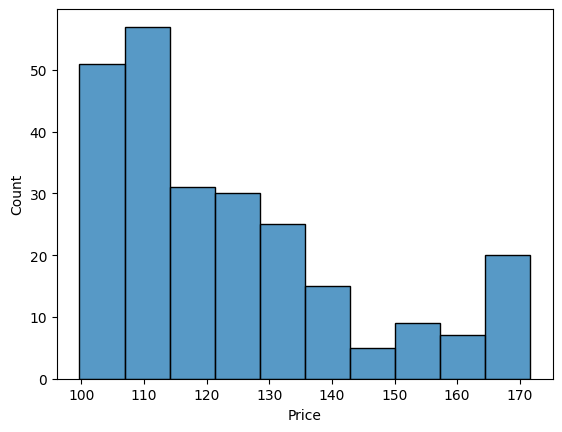

In [4]:
# Since we are using a lot of different datasets for now I will used the SNS methods just for Glass Prices
sns.histplot(PPI_Glass,x=cN[1])

# (3) Two-Feature Plots
For this section, we are asked to show an example of sns.scatterplot, sns.swarmplot, and sns.stripplot with alterations to the Hue, Style, and Size.

## Scatter Plot
For the scatterplot, I will be showing values for some of the states in the Zillow Dataset. For now, I will be showing California, Texas, Florida, and New York. I chose these states because they were ones I expected to be more expensive compared to Texas. It displays the price of of the aformentioned states from 2000 until 2024.

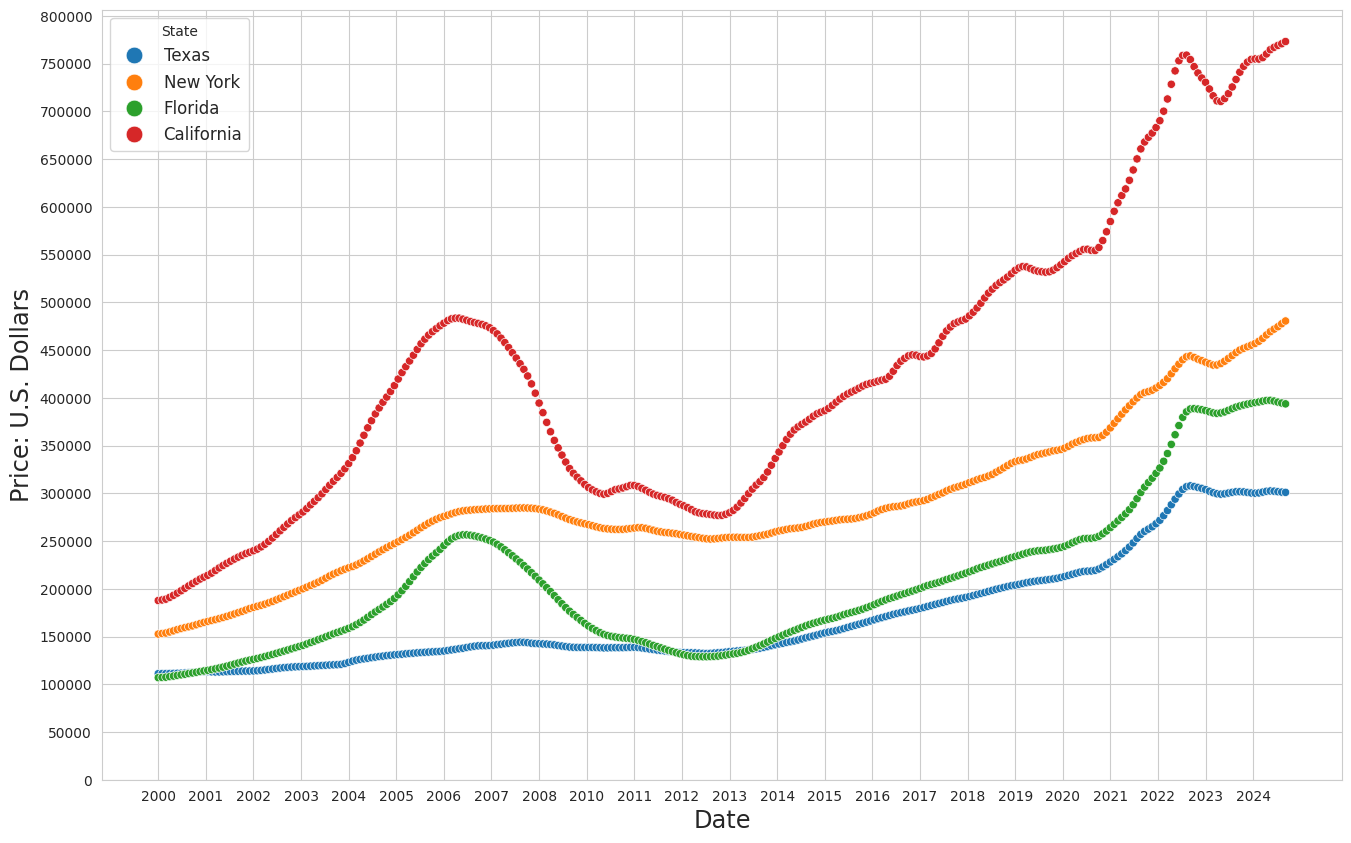

In [5]:
Zillow_long = pd.melt(Zillow, id_vars=Zillow.columns[0],
                     value_vars=[Zillow.columns[i] for i in [6, 4, 3, 2]],  # Texas, New York, Florida, California
                     var_name='State_Name', value_name='State')
Zillow_long = Zillow_long.rename(columns={Zillow.columns[0]: 'Date'})

plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
plt.xlabel("Date",  fontsize = "xx-large")
plt.ylabel("Price: U.S. Dollars", fontsize = "xx-large")
sns.scatterplot(data=Zillow_long,x=Zillow_long.Date,y=Zillow_long.State, hue='State_Name')
plt.yticks(range(0, int(Zillow_long['State'].max()) + 50000, 50000))
plt.minorticks_off
plt.xscale("linear")
plt.xticks(minor = True)
plt.xticks(ticks = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5, 125, 137.5, 150, 162.5, 175, 187.5, 200, 212.5, 225, 237.5, 250, 262.5, 275, 287.5],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"])
plt.legend(title='State', loc='upper left', fontsize="12", markerscale=2)

This scatter plot shows that the prices of houses in four of the biggest markets in the United States have risen, strangely both Florida and California had major spikes in housing cost from the years of 2004 to 2008. Neither Texas of New York had such a spike in that time period. Florida also noticed a far larger increasein price since 2014.

## Strip Plot
For the strip plot, I've decided to compare the home prices in Texas over time to some of our closest neighboring states. We will be looking at Texas, Arizona, Louisiana, Colorado, and South Dakota. It displays the price of of the aformentioned states from 2000 until 2024.

<ipython-input-6-585318a777ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ZillowTrunc["Date"] = pd.to_datetime(ZillowTrunc["Date"], format='%Y-%m-%d')


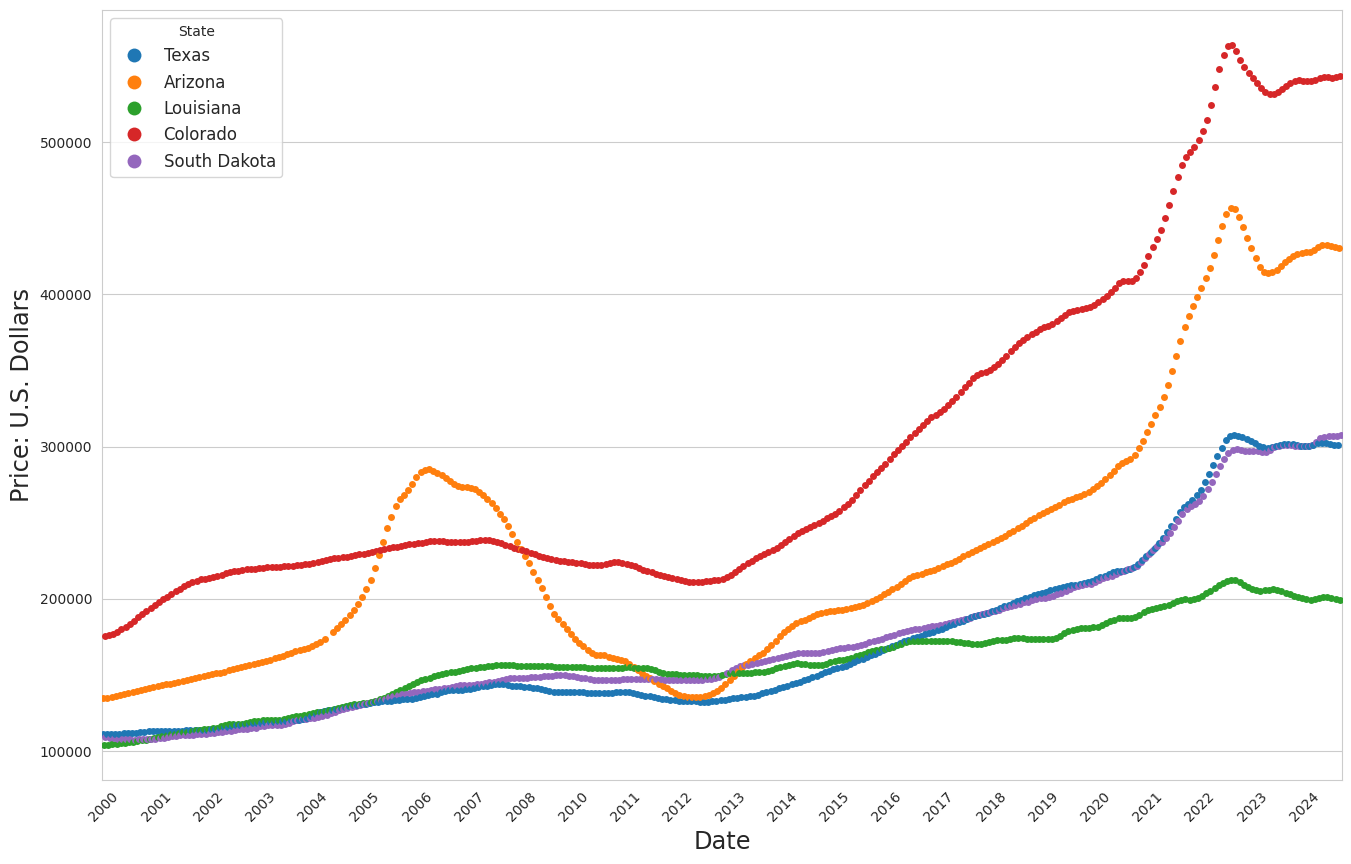

In [6]:
ZillowTrunc = Zillow[["Texas", "Arizona", "Louisiana", "Colorado", "South Dakota", "Date"]]

# Convert to datetime
ZillowTrunc["Date"] = pd.to_datetime(ZillowTrunc["Date"], format='%Y-%m-%d')

# Melt the DataFrame to long format
ZillowLong = ZillowTrunc.melt(id_vars='Date', var_name='State', value_name='Price')

# Create the stripplot (without setting Date as index)
plt.figure(figsize=(16,10))
sns.stripplot(x="Date", y="Price", hue="State", data=ZillowLong, jitter=True, dodge=True)
plt.xticks(ticks = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5, 125, 137.5, 150, 162.5, 175, 187.5, 200, 212.5, 225, 237.5, 250, 262.5, 275, 287.5],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"])
plt.legend(title='State', loc='upper left', fontsize="12", markerscale=2)
plt.xticks(rotation=45)
plt.ylabel("Price: U.S. Dollars", fontsize = "xx-large")
plt.xlabel("Date",  fontsize = "xx-large")
plt.show()

This strip plot shows us how prices have trended in Texas compared to its closest closest neighbors. The plot shows us that Colorado started out as and ended as the most expensive real estate market of these 5 states. Arizona however, has a massive spike not shared by the other 4 states. Louisiana convversly, didn't have nearly as big of a spike from the pandemic as the others. South Dakota is the closest to Texas for the longest amount of time, with the lines separating the most between 2008 and 2017, but practically overlapping otherwise.

## Swarm plot
Lastly our swarmplot. It is covering the states of California, Texas, Michigan. and Colorado. I chose these states because they have little overlap in points, allowing them to fit on the graph. This graph compares price against time for each of the states. The x axis scale is not perfectly scaled to the y data due to size constraints, but it's very close. It displays the price of of the aformentioned states from 2000 until 2024.

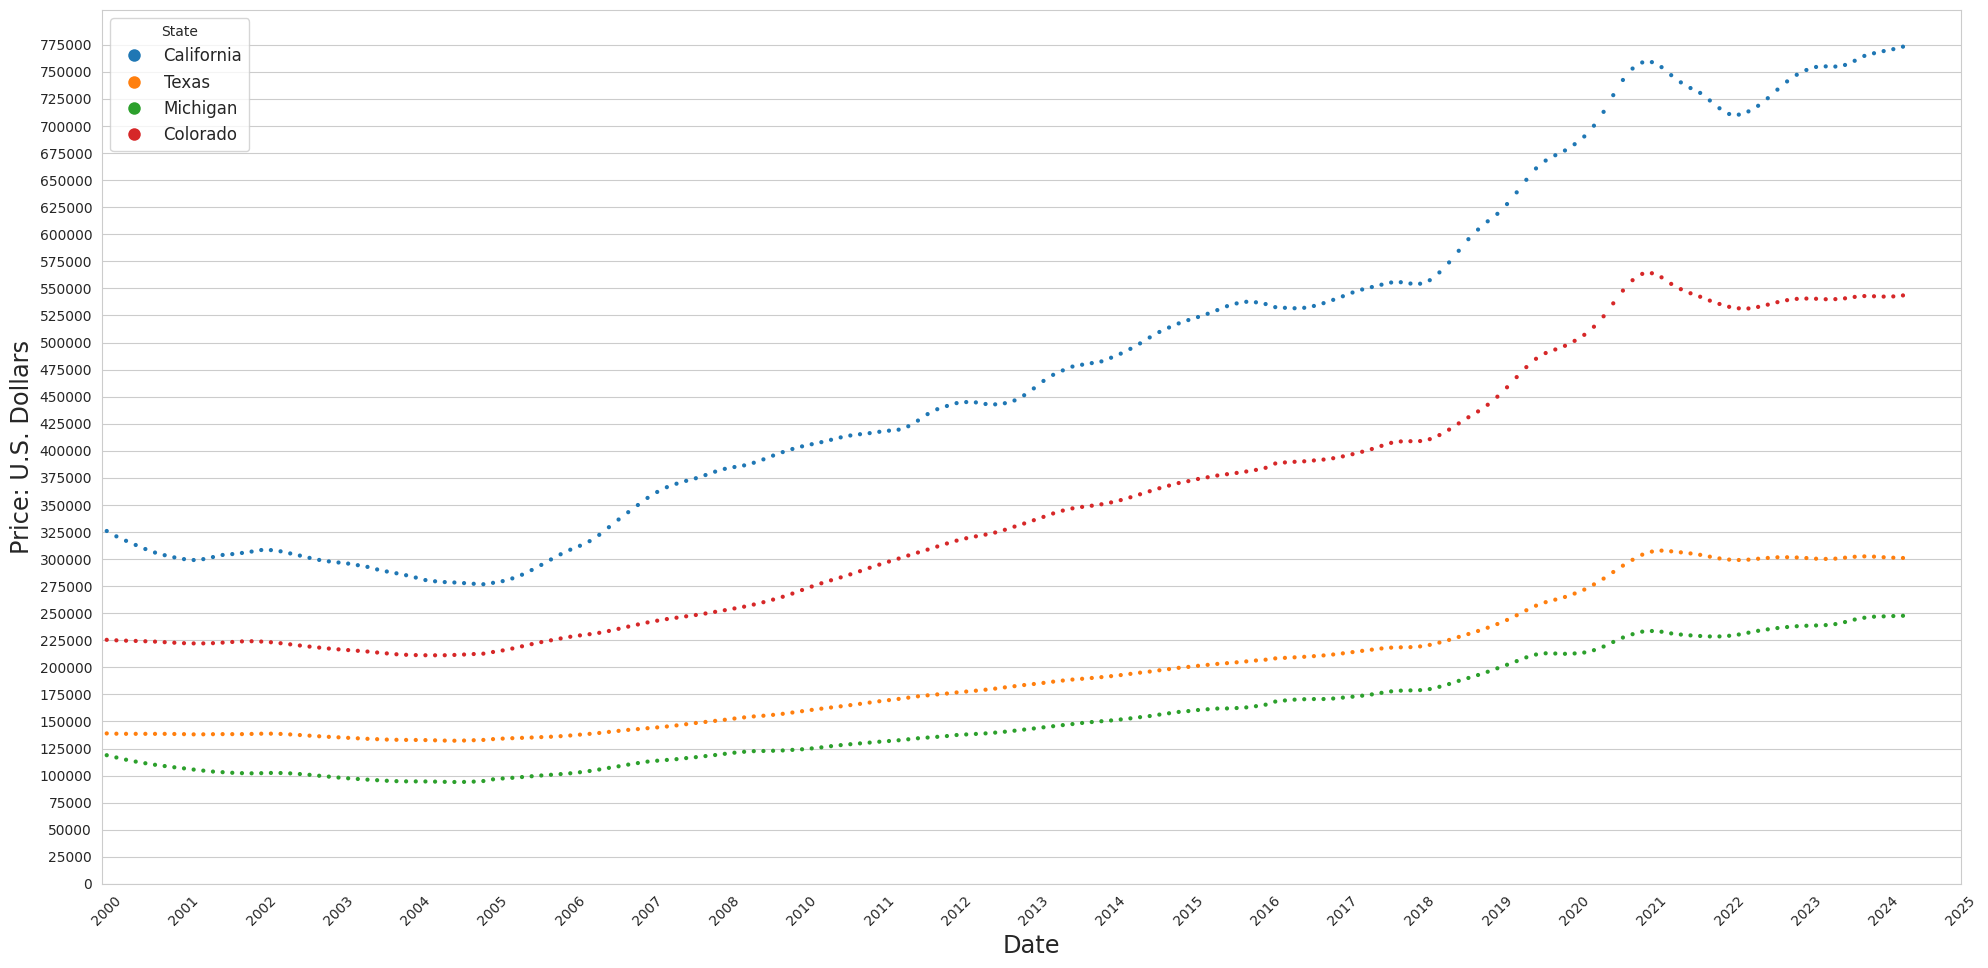

In [7]:
ZillowEdit = Zillow
ZillowEdit = ZillowEdit.rename(columns={ZillowEdit.columns[0]: 'Date'})
ZillowEdit = ZillowEdit.dropna()
ZillowEditmelted = pd.melt(ZillowEdit, id_vars='Date', value_vars=['California', 'Texas', 'Michigan', 'Colorado'], var_name='State', value_name='Price')
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.swarmplot(x='Date', y='Price', hue='State', data=ZillowEditmelted, size=3)
plt.tight_layout()
plt.legend(title='State', loc='upper left', fontsize="12", markerscale=3)
plt.xticks(ticks = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
plt.yticks(range(0, int(Zillow_long['State'].max()) + 25000, 25000))
plt.ylabel("Price: U.S. Dollars", fontsize = "xx-large")
plt.xlabel("Date",  fontsize = "xx-large")
plt.show()
#print(ZillowEditmelted)

Although not visualized here directly, while working with this graph, I noticed how each state is in a "group" and have there prices overlap greatly. This made making this plot slightly difficult as overalp was causing points to not show. This graph does directly show that the prices of each state seem to increase and decrease at the same time.

# (4) Summarization of Data
Summarizes the data using df.shape, df.info(), and df.describe(include = "all")

#### Glass
Producer Price Index by Industry: Glass and Glass Product Manufacturing

https://fred.stlouisfed.org/series/PCU3272132721

In [8]:
PPI_Glass.shape
PPI_Glass.info()
PPI_Glass.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    250 non-null    object 
 1   Price   250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


,DATE,Price
count,250,250.00
unique,250,NaN
top,2003-12-01,NaN
freq,1,NaN
mean,NaN,123.64
std,NaN,19.93
min,NaN,99.70
25%,NaN,109.52
50%,NaN,116.50
75%,NaN,134.30


#### Lumber
Producer Price Index by Commodity: Lumber and Wood Products

https://fred.stlouisfed.org/series/WPU08

In [9]:
PPI_Lumber.shape
PPI_Lumber.info()
PPI_Lumber.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1185 non-null   object 
 1   Price   1185 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


,DATE,Price
count,1185,1185.00
unique,1185,NaN
top,1926-01-01,NaN
freq,1,NaN
mean,NaN,100.04
std,NaN,87.33
min,NaN,5.30
25%,NaN,31.60
50%,NaN,64.90
75%,NaN,179.70


#### Asphalt
Producer Price Index by Industry: Asphalt Shingle and Coating Materials Manufacturing

https://fred.stlouisfed.org/series/WPU08

In [10]:
PPI_Asphalt.shape
PPI_Asphalt.info()
PPI_Asphalt.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    586 non-null    object 
 1   Price   586 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


,DATE,Price
count,586,586.00
unique,586,NaN
top,1975-12-01,NaN
freq,1,NaN
mean,NaN,153.97
std,NaN,76.72
min,NaN,58.40
25%,NaN,99.10
50%,NaN,108.45
75%,NaN,228.90


#### Cement
Producer Price Index by Industry: Cement and Concrete Product Manufacturing

https://fred.stlouisfed.org/series/PCU32733273

In [11]:
PPI_Cement.shape
PPI_Cement.info()
PPI_Cement.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    250 non-null    object 
 1   Price   250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


,DATE,Price
count,250,250.00
unique,250,NaN
top,2003-12-01,NaN
freq,1,NaN
mean,NaN,157.06
std,NaN,35.31
min,NaN,100.00
25%,NaN,135.00
50%,NaN,146.30
75%,NaN,174.98


#### Plumbing
Producer Price Index by Industry: Plumbing Fixture Fitting and Trim Manufacturing

https://fred.stlouisfed.org/series/PCU332913332913

In [12]:
PPI_Plumbing.shape
PPI_Plumbing.info()
PPI_Plumbing.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    933 non-null    object 
 1   Price   933 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.7+ KB


,DATE,Price
count,933,933.00
unique,933,NaN
top,1947-01-01,NaN
freq,1,NaN
mean,NaN,130.91
std,NaN,101.39
min,NaN,17.40
25%,NaN,32.90
50%,NaN,106.00
75%,NaN,198.70


#### Metals
Producer Price Index by Commodity: Metals and Metal Products: Steel Wire, Stainless Steel

https://fred.stlouisfed.org/series/WPU10170502

In [13]:
PPI_Metals.shape
PPI_Metals.info()
PPI_Metals.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    152 non-null    object 
 1   Price   152 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


,DATE,Price
count,152,152.00
unique,152,NaN
top,2010-12-01,NaN
freq,1,NaN
mean,NaN,112.50
std,NaN,31.33
min,NaN,83.80
25%,NaN,91.57
50%,NaN,100.05
75%,NaN,118.65


#### Sticky Price
Sticky Price: Inflation dataset from FRED

https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL

In [14]:
StickyPrice.shape
StickyPrice.info()
StickyPrice.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    681 non-null    object 
 1   Value   681 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


,DATE,Value
count,681,681.00
unique,681,NaN
top,1968-01-01,NaN
freq,1,NaN
mean,NaN,4.33
std,NaN,2.68
min,NaN,0.66
25%,NaN,2.46
50%,NaN,3.38
75%,NaN,5.18


#### ComRealPrice
Commercial Real Estate Prices for United States. FRED dataset, very small.

https://fred.stlouisfed.org/series/COMREPUSQ159N

In [15]:
ComRealPri.shape
ComRealPri.info()
ComRealPri.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    77 non-null     object 
 1   Value   77 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


,DATE,Value
count,77,77.00
unique,77,NaN
top,2005-01-01,NaN
freq,1,NaN
mean,NaN,3.99
std,NaN,9.79
min,NaN,-30.40
25%,NaN,0.73
50%,NaN,5.35
75%,NaN,10.29


#### Inflation
U.S. Inflation Dataset from Kaggle

https://www.kaggle.com/datasets/pavankrishnanarne/us-inflation-dataset-1947-present

In [16]:
Inflation.shape
Inflation.info()
Inflation.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    918 non-null    object 
 1   value   918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB


,date,value
count,918,918.00
unique,918,NaN
top,1947-01-01,NaN
freq,1,NaN
mean,NaN,117.79
std,NaN,83.74
min,NaN,21.48
25%,NaN,32.10
50%,NaN,106.90
75%,NaN,188.00


#### Zillow
Zillow's Zestimates from Kaggle.

https://www.kaggle.com/datasets/robikscube/zillow-home-value-index

In [17]:
ZillowRound = Zillow
ZillowRound.shape
ZillowRound.info()
ZillowRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      297 non-null    object 
 1   Virginia                  297 non-null    float64
 2   California                297 non-null    float64
 3   Florida                   297 non-null    float64
 4   New York                  297 non-null    float64
 5   New Jersey                297 non-null    float64
 6   Texas                     297 non-null    float64
 7   Michigan                  297 non-null    float64
 8   Massachusetts             297 non-null    float64
 9   Arizona                   296 non-null    float64
 10  Washington                297 non-null    float64
 11  Colorado                  297 non-null    float64
 12  Illinois                  297 non-null    float64
 13  the District of Columbia  297 non-null    float64
 14  Nevada    

,Date,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
count,297,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,296.00,...,297.00,297.00,297.00,297.00,270.00,297.00,296.00,297.00,297.00,297.00
unique,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,242488.31,429145.13,207179.48,288656.41,322526.22,170325.95,147371.77,365521.56,233011.82,...,122494.35,147074.45,132035.81,250994.49,227735.07,122222.99,174020.48,151438.91,136942.68,137675.35
std,NaN,63730.11,156266.88,79452.69,77960.39,79099.36,58160.31,40109.98,99571.81,89852.06,...,31943.86,38018.71,35251.78,58175.47,53584.35,32100.63,56257.25,41923.50,33495.73,32365.92
min,NaN,123345.47,187686.83,106914.49,152590.52,168867.68,111067.07,94106.30,194441.92,134673.83,...,84888.60,96355.62,87834.71,147889.12,143894.46,81317.07,107542.72,107906.33,91262.66,105495.85
25%,NaN,214351.97,301556.59,144823.91,253787.07,278516.15,132901.50,121184.68,303774.76,160742.17,...,104538.12,123671.96,112836.89,216604.69,200597.70,103589.95,138535.78,125520.84,117911.36,116621.97
50%,NaN,237064.01,412385.37,188508.75,273168.67,310641.73,141492.32,139304.56,341643.68,207504.59,...,109412.20,134960.05,118984.89,246237.74,214299.00,110293.63,150640.97,131850.81,122889.18,126542.66
75%,NaN,265324.56,523548.17,243882.46,326718.84,357889.49,201412.42,160608.48,412832.63,272287.70,...,132860.29,157237.97,143458.38,273233.50,245455.18,130922.18,199129.85,168436.58,152967.51,143455.34


## Summary
These built in functions show us a lot of details about each of the datasets. Although, a large majority of this we did already know from earilier manuipulation.

# (5) Visualization of Data
Here we will be showing the requested histogram, boxplot, and scatter matrix

### Zillow
Since the Zillow dataset has every state and the District of Columbia, applying a hist() function to it isn't pretty. So We are skipping it.

In [18]:
#Zillow.hist()
#plt.title("Histogram of Zillow prices")

### PPI_Lumber
Now we will create a histogram based on our PPI_Lumber dataset.

Text(0.5, 1.0, 'Histogram of Lumber prices')

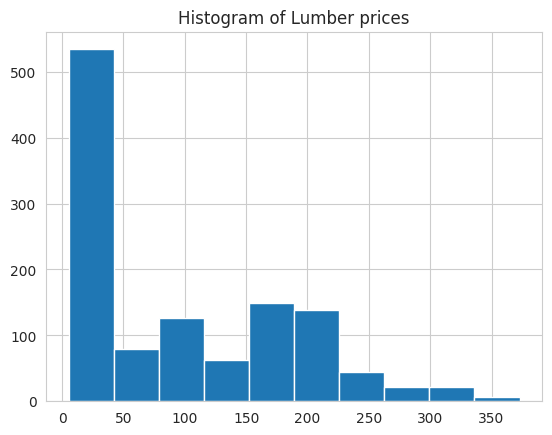

In [19]:
PPI_Lumber.hist()
plt.title("Histogram of Lumber prices")

Lumber shows what we saw in glass, but far more effectively. This is because our lumber dataset began taking monthly datapoints back in 1927, meaning there are far more values from before inflation spiked.

### PPI_Asphalt
Now we will create a histogram based on our PPI_Asphalt dataset.

Text(0.5, 1.0, 'Histogram of Asphalt prices')

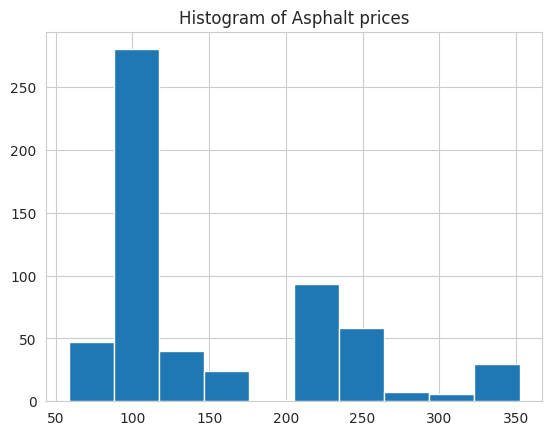

In [20]:
PPI_Asphalt.hist()
plt.title("Histogram of Asphalt prices")

Our Asphalt dataset shows something strange, a complete gap between values. From around 175-205, there is not a single recorded value, this indicates there was quite a jump in value.

### PPI_Cement
Now we will create a histogram based on our PPI_Cement dataset.

Text(0.5, 1.0, 'Histogram of Cement Prices')

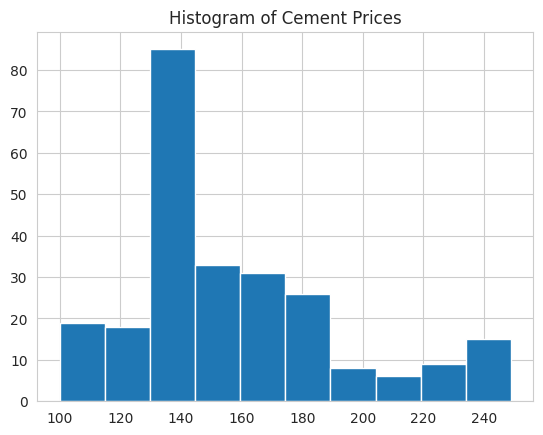

In [21]:
PPI_Cement.hist()
plt.title("Histogram of Cement Prices")

Cement is the first dataset to show a more middle centered distribution. It is still left justified, which is expected as inflation has increased more recently, and rarely decreases back to original values.

### PPI_Plumbing
Now we will create a histogram based on our PPI_Plumbing dataset.

Text(0.5, 1.0, 'Histogram of Plumbing Prices')

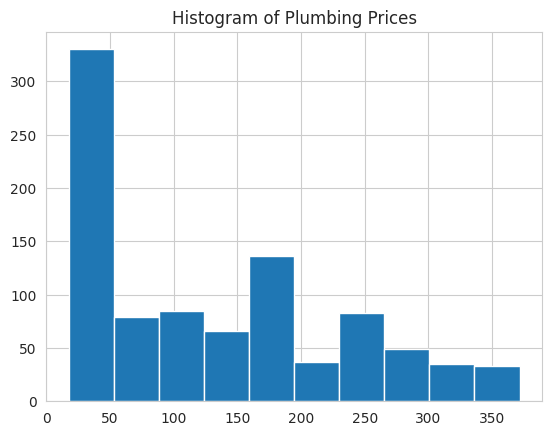

In [22]:
PPI_Plumbing.hist()
plt.title("Histogram of Plumbing Prices")

The plumbing dataset also began taking measurements earlier in the 1900's than the other PPI datasets. PPI_Plumbing began measurements in 1947. This explains why its distribution is similar to the lumber datasets.

### PPI_Metals
Now we will create a histogram based on our PPI_Metals dataset.

Text(0.5, 1.0, 'Histogram of Metal Prices')

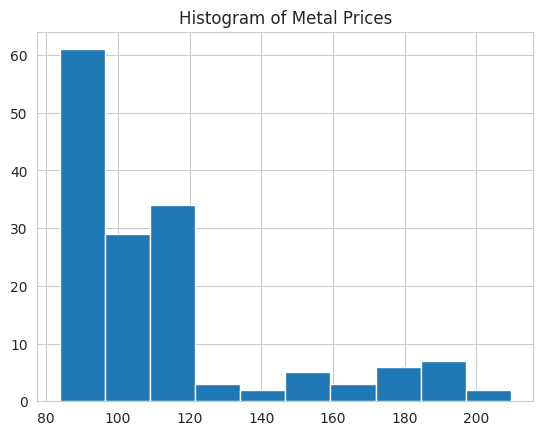

In [23]:
PPI_Metals.hist()
plt.title("Histogram of Metal Prices")

The metals dataset is extremely left justified, it shows a distribution that clearly indidcates prices have more often than not, been low.

### Summary/Observations
All of the plots are more justified to the left side, meaning things over the course of history have been cheaper than they are now. This aligns with how inflation normally works. Even stronger justification for this conclusion is that the two sets that started recording earliest, lumber and plumbing, had the most values on the lower end


# (6) Detecting Outliers
To detect outlies, I will primarly be using scatter plots, as they make outliers easy to spot. We will focus on datasets not obtained from Kaggle, as they almost definitly have had there outliers removed. I should note that I had to mess with the x tick values and locations, this manual placement of tick values means they could be slightly off, however, this should not affect our attempt to visualize outliers, and the inaccuracy should be minimal.

## PPI-Glass
The first dataset I will be placing into a scatter plot is PPI_Glass.

Text(0.5, 1.0, 'Glass Price by Date')

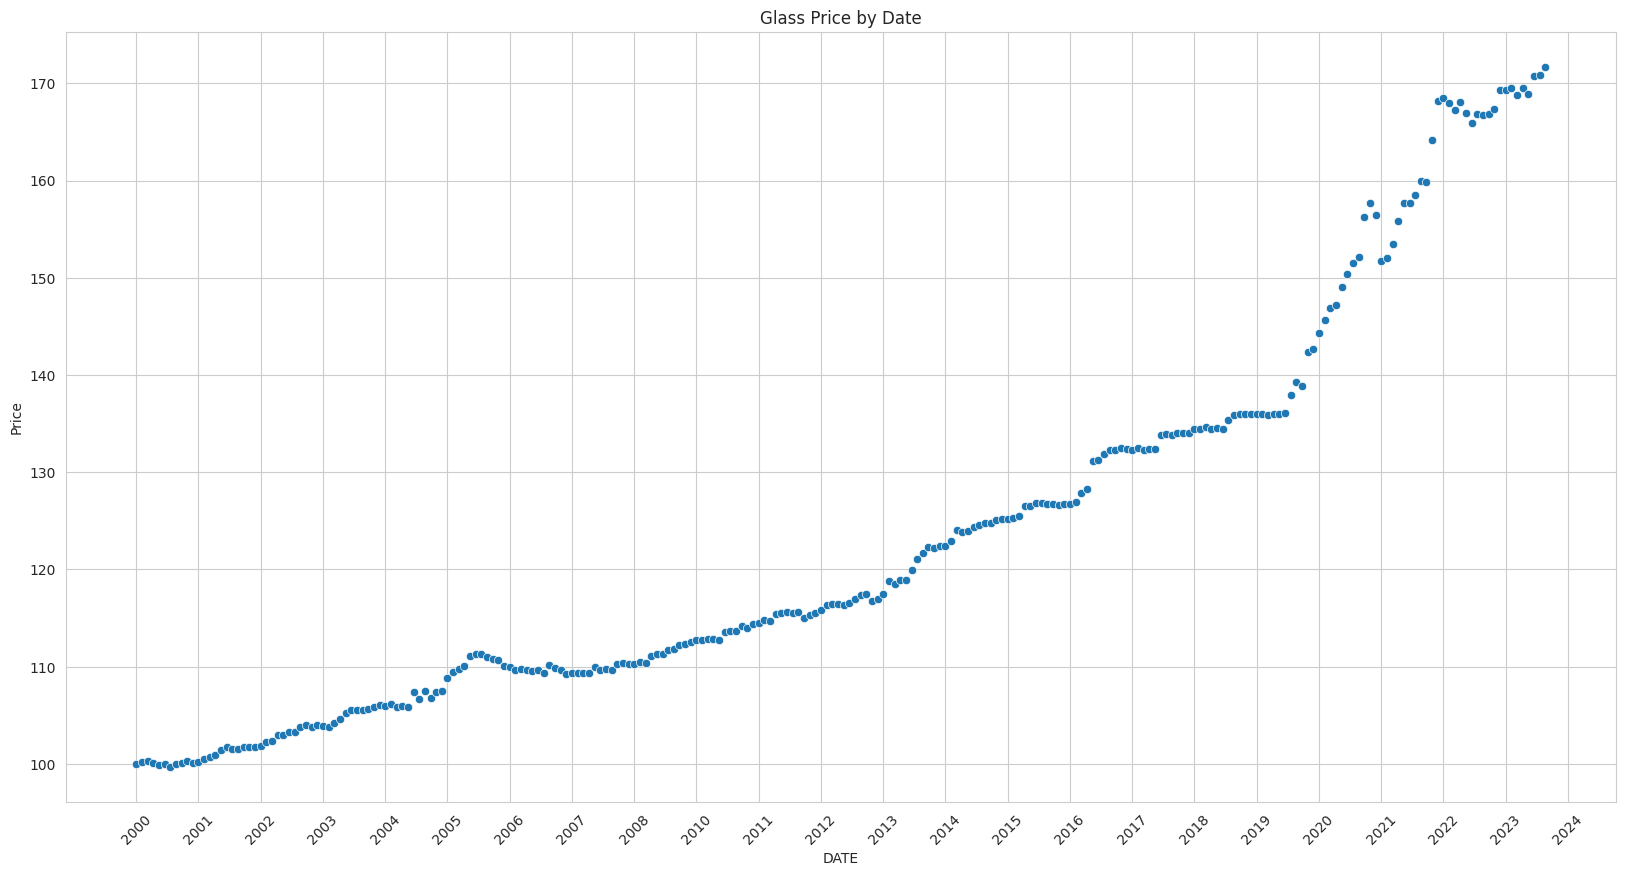

In [24]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121, 132, 143, 154, 165, 176, 187, 198, 209, 220, 231, 242, 253, 264],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(PPI_Glass, x = PPI_Glass.columns[0], y = PPI_Glass.columns[1])
plt.title('Glass Price by Date')

 From this scatter plot we can tell that PPI_Glass does not have any major outliers. We can also notice prices begin spiking at a much faster rate around 2019, growing faster until around 2023, when the increase seems to be returning to normal.

## PPI-Lumber
Next up for a scatter plot is PPI_Lumber

Text(0.5, 1.0, 'Lumber Price by Date')

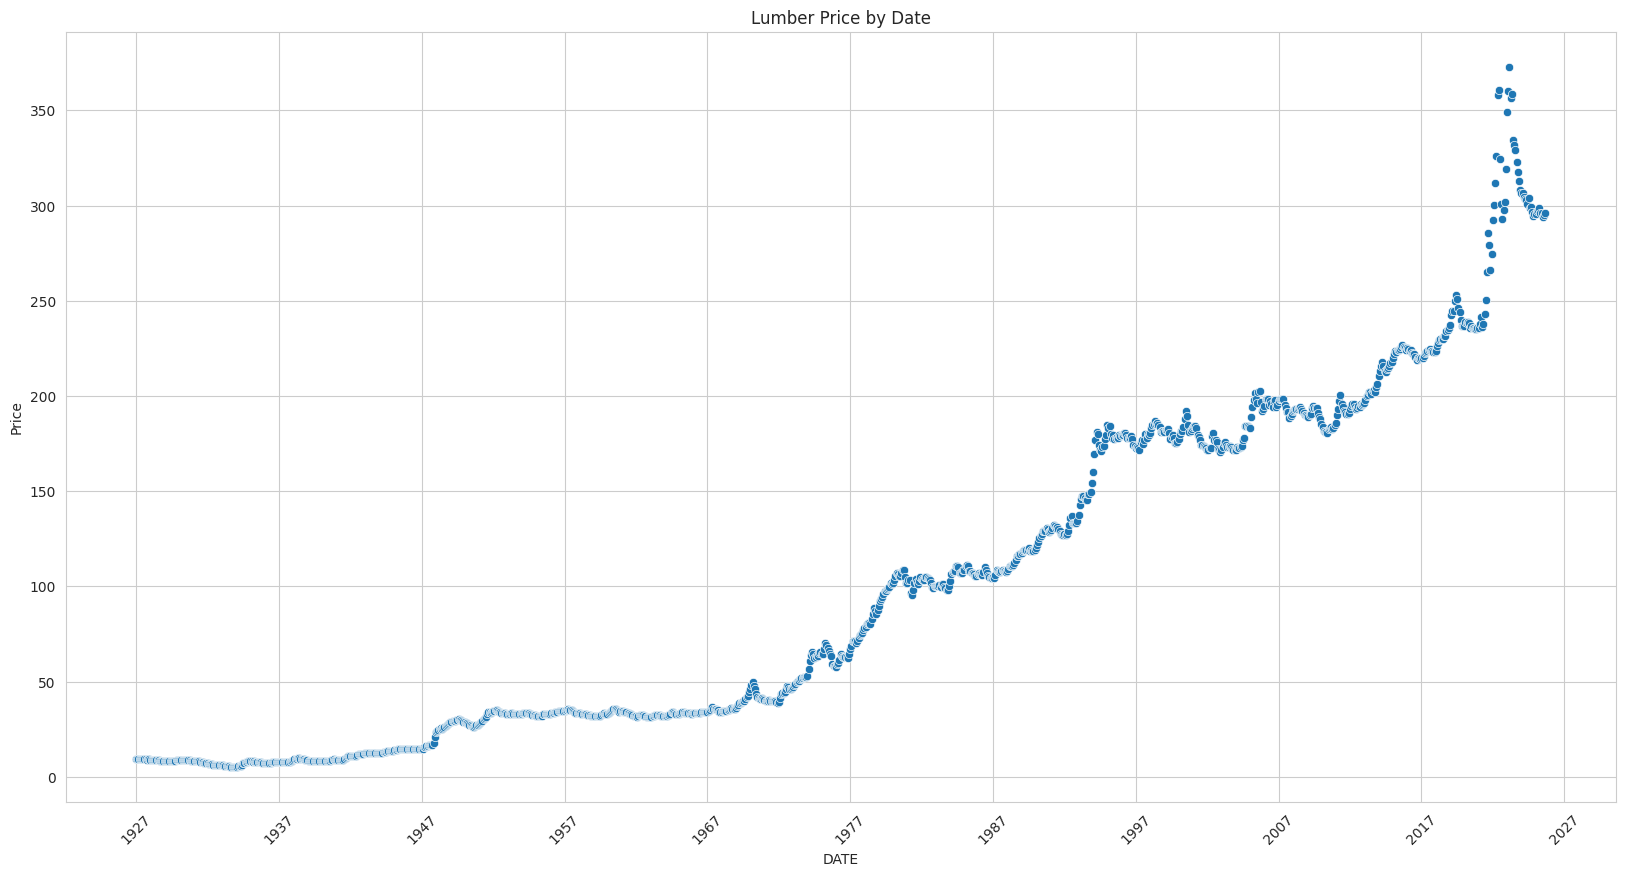

In [25]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200],
           labels = ["1927", "1937", "1947", "1957", "1967", "1977", "1987", "1997", "2007", "2017", "2027"])
sns.scatterplot(PPI_Lumber, x = PPI_Lumber.columns[0], y = PPI_Lumber.columns[1])
plt.title('Lumber Price by Date')

As far as outliers, there do not seem to be any outliers beyond reason. There is a single datapoint between 2017 and 2027 that is a bit higher than the others, but it is still within reason. This scatter plot also shows that Lumber prices use to be fairly stable, increasing at a slow rate until the late 1970's, where price growth begain to speed up. We also see after 1997 that the price begins to jump around, going up and down in cycles while maintaining an upward trajectory. It also shows a fairly large dip in the 2023-2024 range, it seems to be recovering faster than other sectors of the market.

## PPI-Plumbing
Next on the scatter plot, PPI_Plumbing.

Text(0.5, 1.0, 'Plumbing Price by Date')

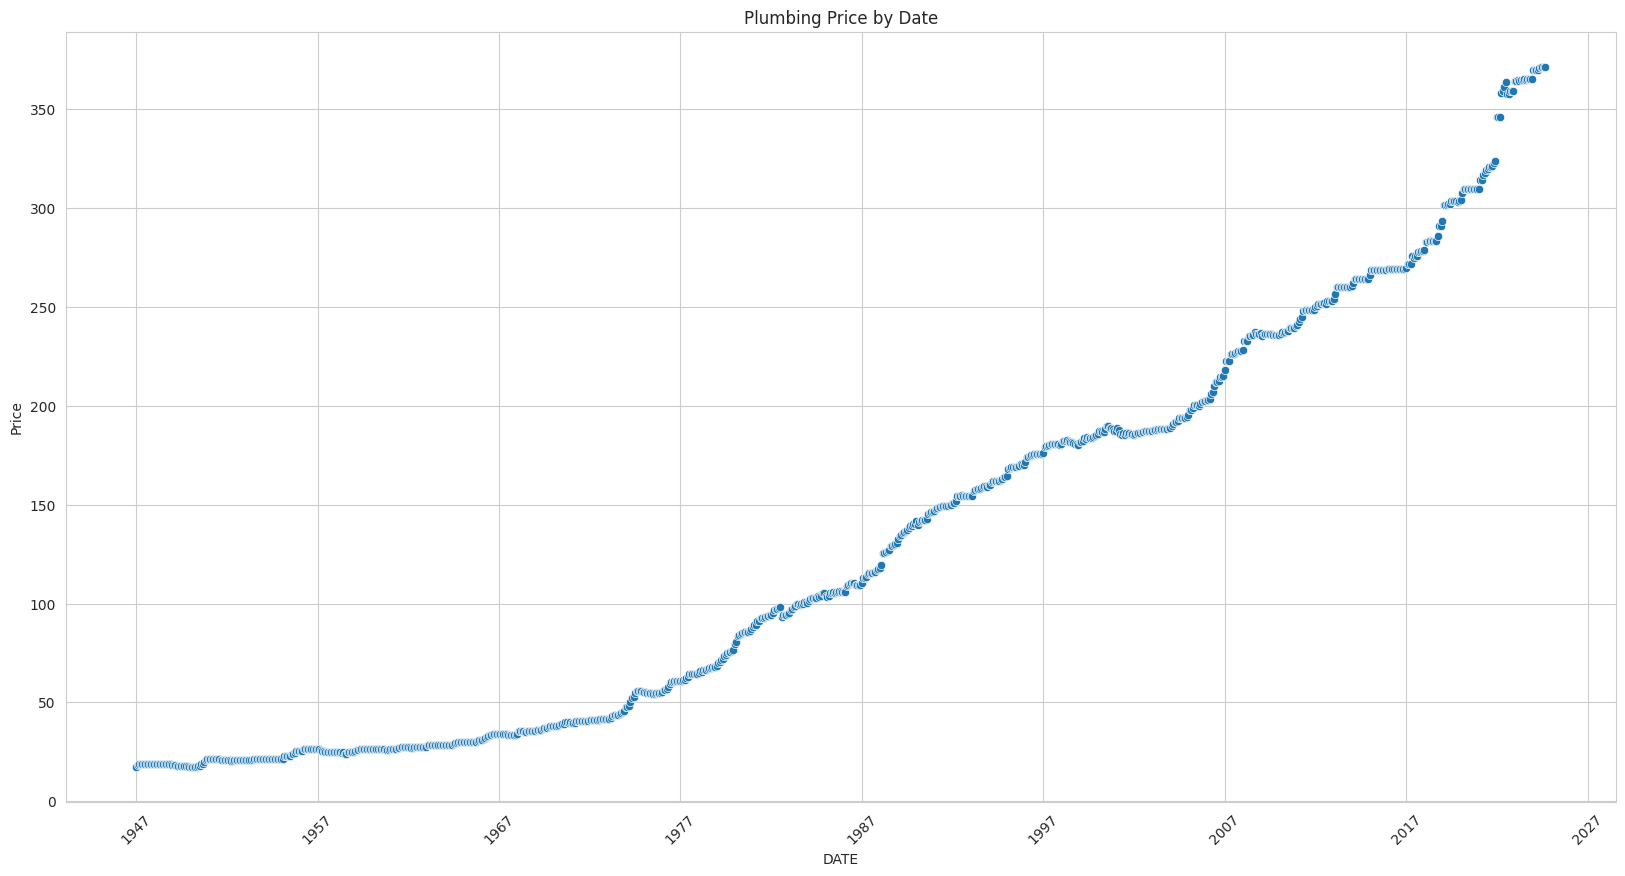

In [26]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 120, 240, 360, 480, 600, 720, 840, 960],
           labels = ["1947", "1957", "1967", "1977", "1987", "1997", "2007", "2017", "2027"])
sns.scatterplot(PPI_Plumbing, x = PPI_Plumbing.columns[0], y = PPI_Plumbing.columns[1])
plt.title('Plumbing Price by Date')

Once again, not any major outliers here. Although our Lumber and Plumbing datasets were very similar in there histograms, Plumbing shows a much more consistent price increase. It does not have any of the major dips that PPI_Lumber had. It does however have a massive price spike between 2020-2022, leaving a decent gap of whitespace between values.

## PPI-Asphalt
Next up, PPI_Asphalt.

Text(0.5, 1.0, 'Asphalt Price by Date')

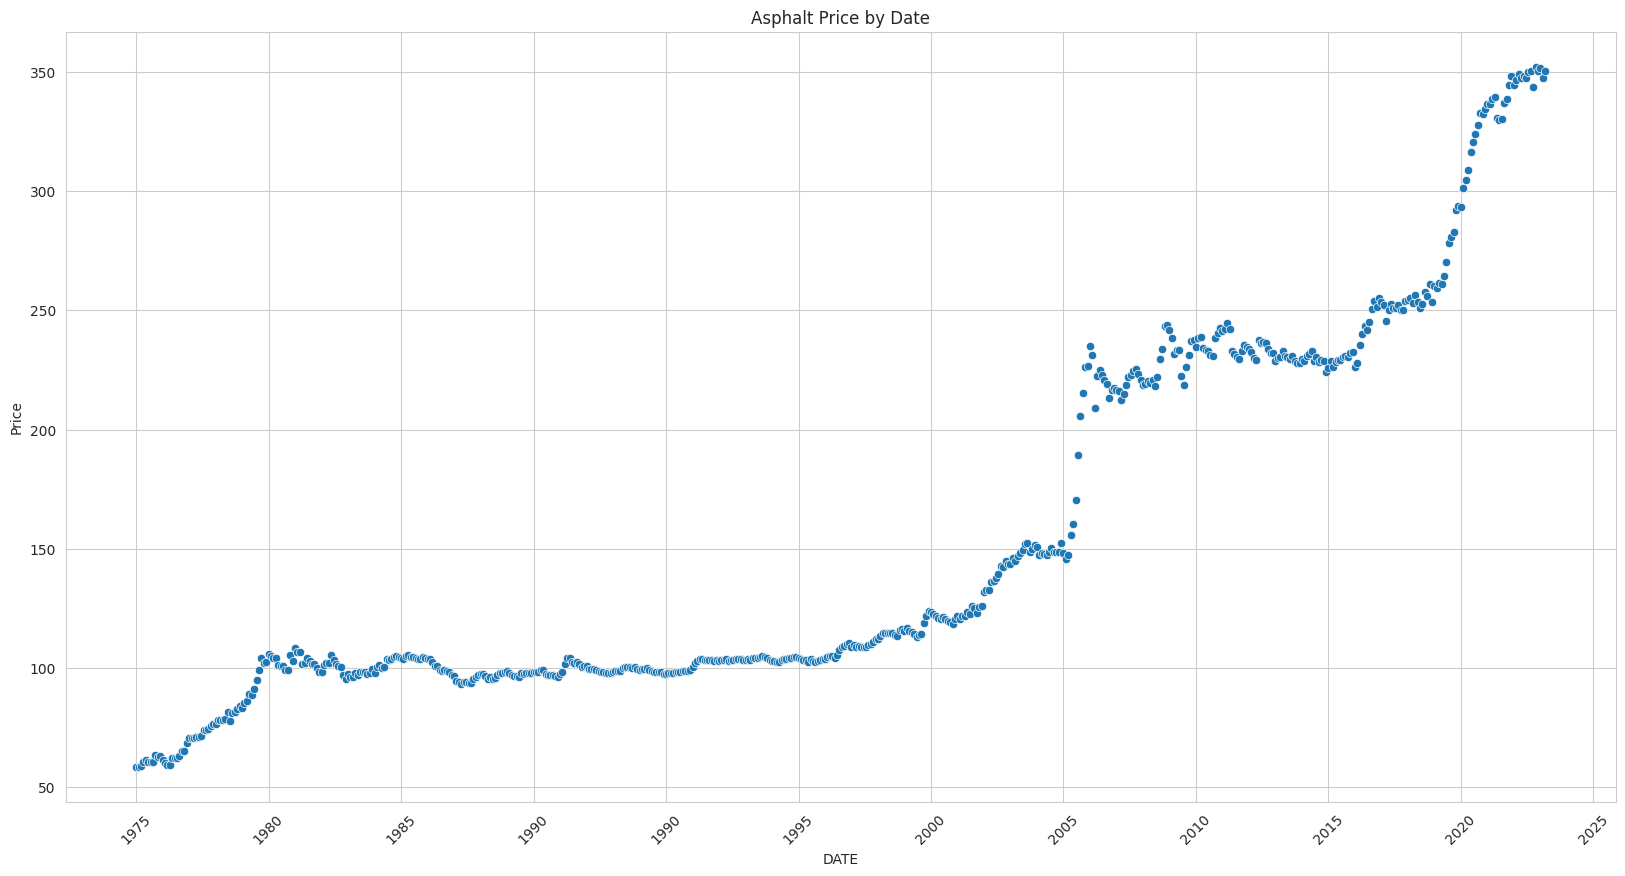

In [27]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 55, 110, 165, 220, 275, 330, 385, 440, 495, 550, 605],
           labels = ["1975", "1980", "1985", "1990", "1990", "1995", "2000", "2005", "2010", "2015", "2020", "2025"])
sns.scatterplot(PPI_Asphalt, x = PPI_Asphalt.columns[0], y = PPI_Asphalt.columns[1])
plt.title('Asphalt Price by Date')

No outliers here. However, the Asphalt dataset does show one of the biggest spikes. Over the course of around 7 months in 2005, the price spiked from around 145-150 to 235-240. This price is a massive increase over such a short period, especially when compared to price increases before the 2005 spike.

## PPI-Cement
Next up, PPI_Cement.

Text(0.5, 1.0, 'Cement Price by Date')

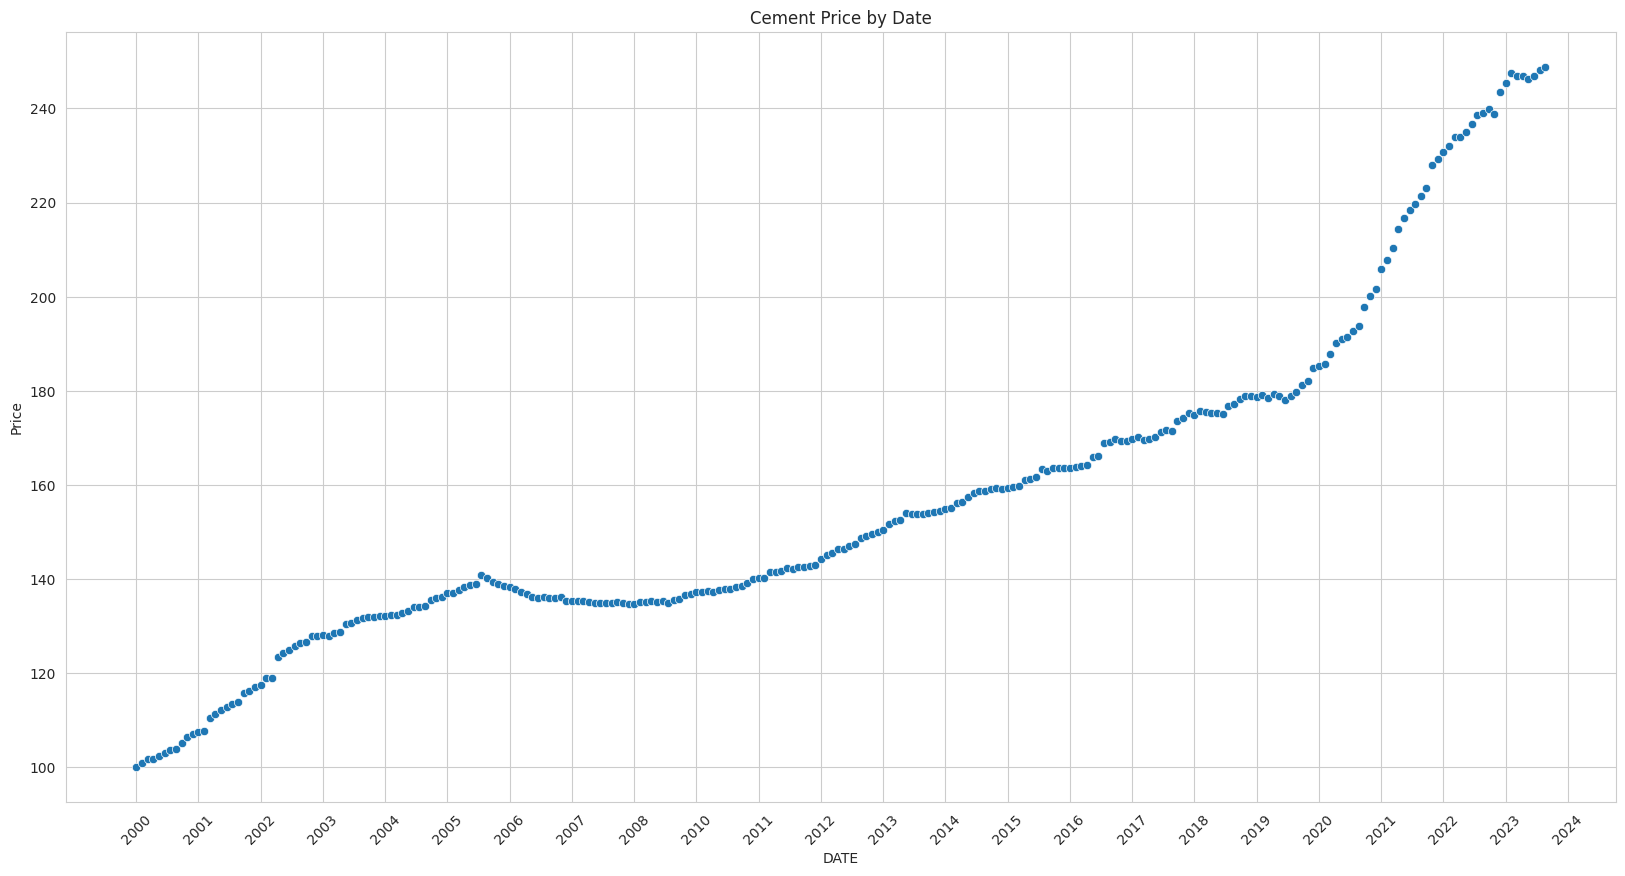

In [28]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121, 132, 143, 154, 165, 176, 187, 198, 209, 220, 231, 242, 253, 264],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(PPI_Cement, x = PPI_Cement.columns[0], y = PPI_Cement.columns[1])
plt.title('Cement Price by Date')

Once again, not any outliers to be spotted here. The cement dataset began taking measurements at the same time as the glass dataset. However, the cement dataset saw a much higher increase in point values, rising to around 250, but glass only saw a max of around 175. This means cement saw a much larger percentage price increase since 2000.

## PPI-Metals
Last of the PPI_Datasets is PPI_Metals.

Text(0.5, 1.0, 'Metals Price by Date')

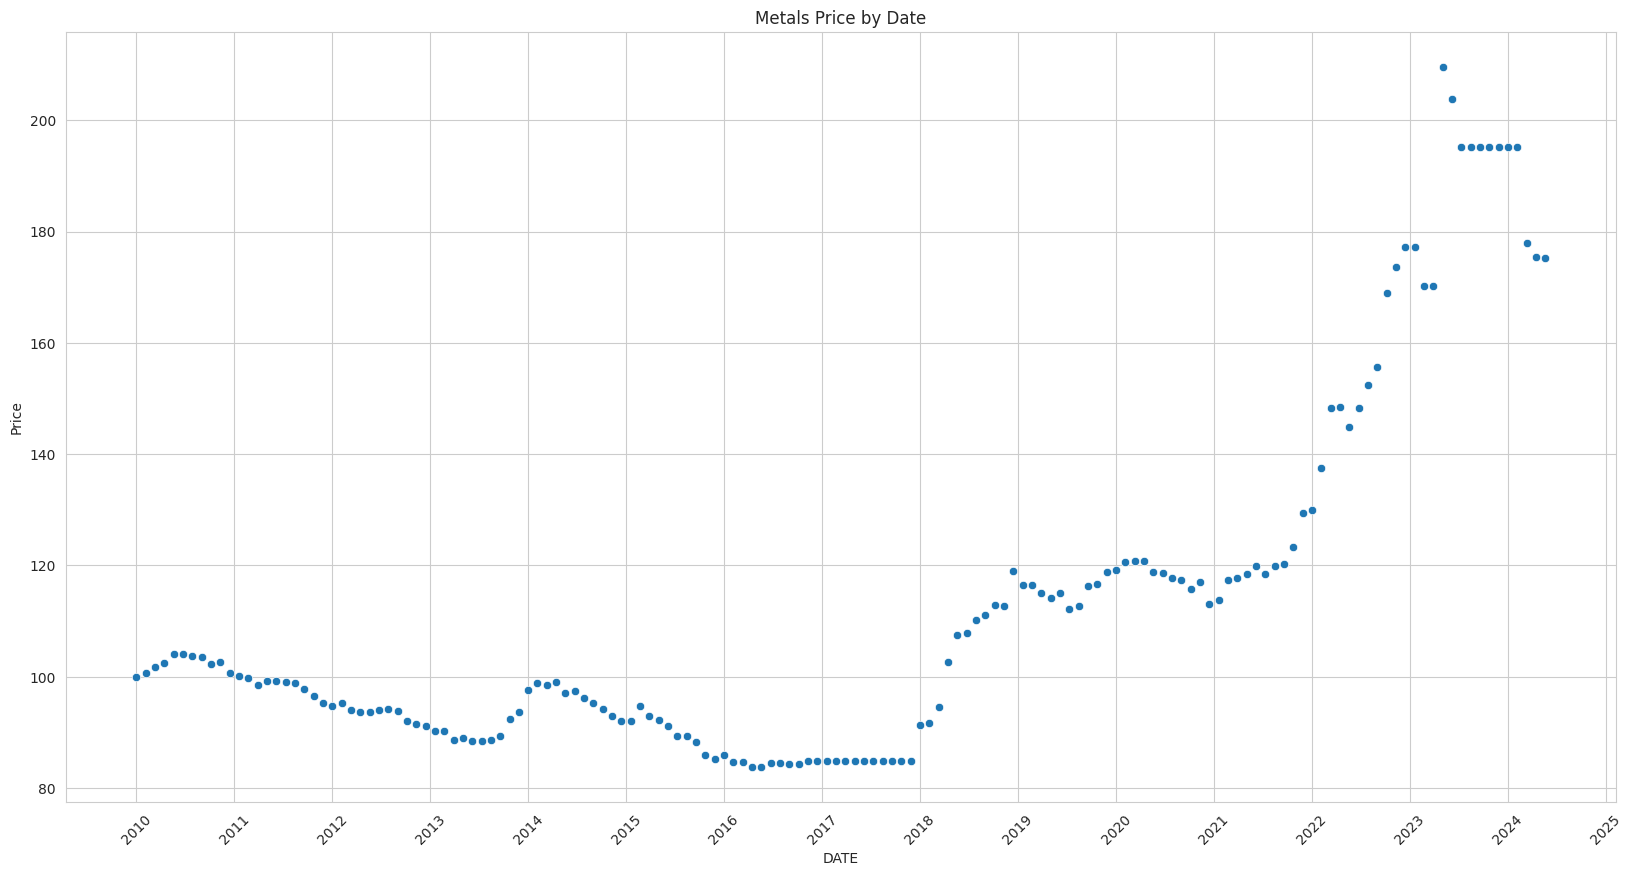

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 10.5, 21, 31.5, 42, 52.5, 63, 73.5, 84, 94.5, 105, 115.5, 126, 136.5, 147, 157.5],
           labels = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(PPI_Metals, x = PPI_Metals.columns[0], y = PPI_Metals.columns[1])
plt.title('Metals Price by Date')

The metals datset also shows large spikes, but it also shows that from 2010 to late 2013, the price was actually declining. Then after a small spike, it started decreasing again. The decreasing trend seemed to stop from 2018 until 2023, but it has starte decreasing again recently.

## Inflation Index
Now, our Inflation index.

Text(0.5, 1.0, 'Inflation Index by Date')

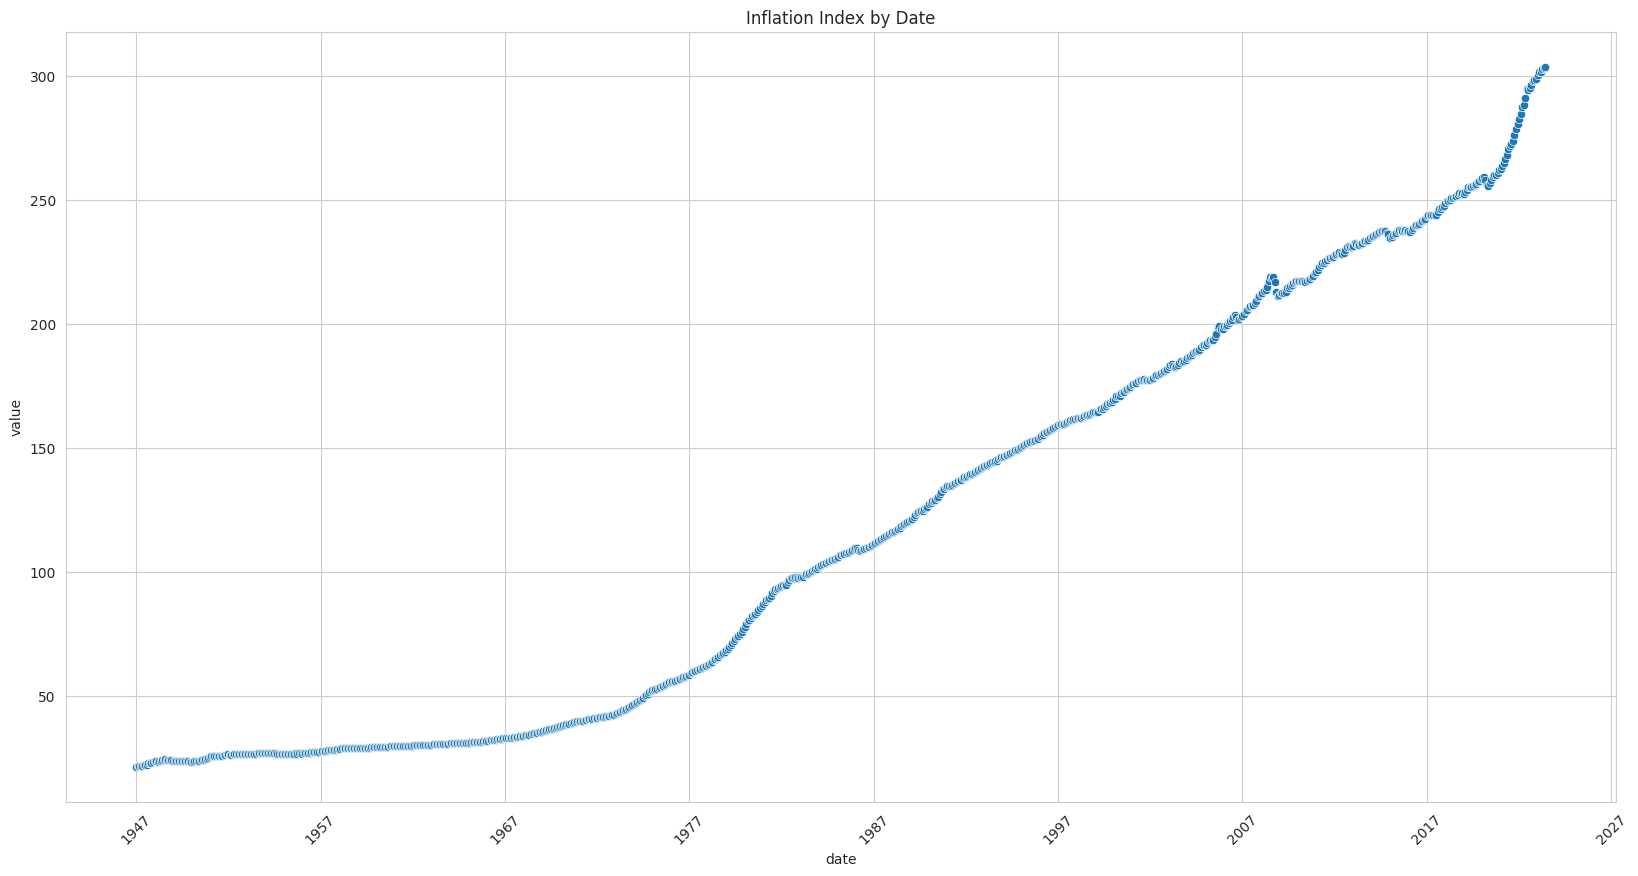

In [30]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 120, 240, 360, 480, 600, 720, 840, 960],
           labels = ["1947", "1957", "1967", "1977", "1987", "1997", "2007", "2017", "2027"])
sns.scatterplot(Inflation, x = Inflation.columns[0], y = Inflation.columns[1])
plt.title('Inflation Index by Date')

Inflation began recording datapoints in 1947 similar to PPI_Plumbing. It has no massive outliers and is fairly consistent in its price rise. The rate at which it increases does change on occasion, but it doesn't really show the massive spikes some of the other datasets showed.

## Commercial Real Estate
Now a scatter plot for our Commercial Real Estate dataset.

Text(0.5, 1.0, 'Real Estate Prices by Date')

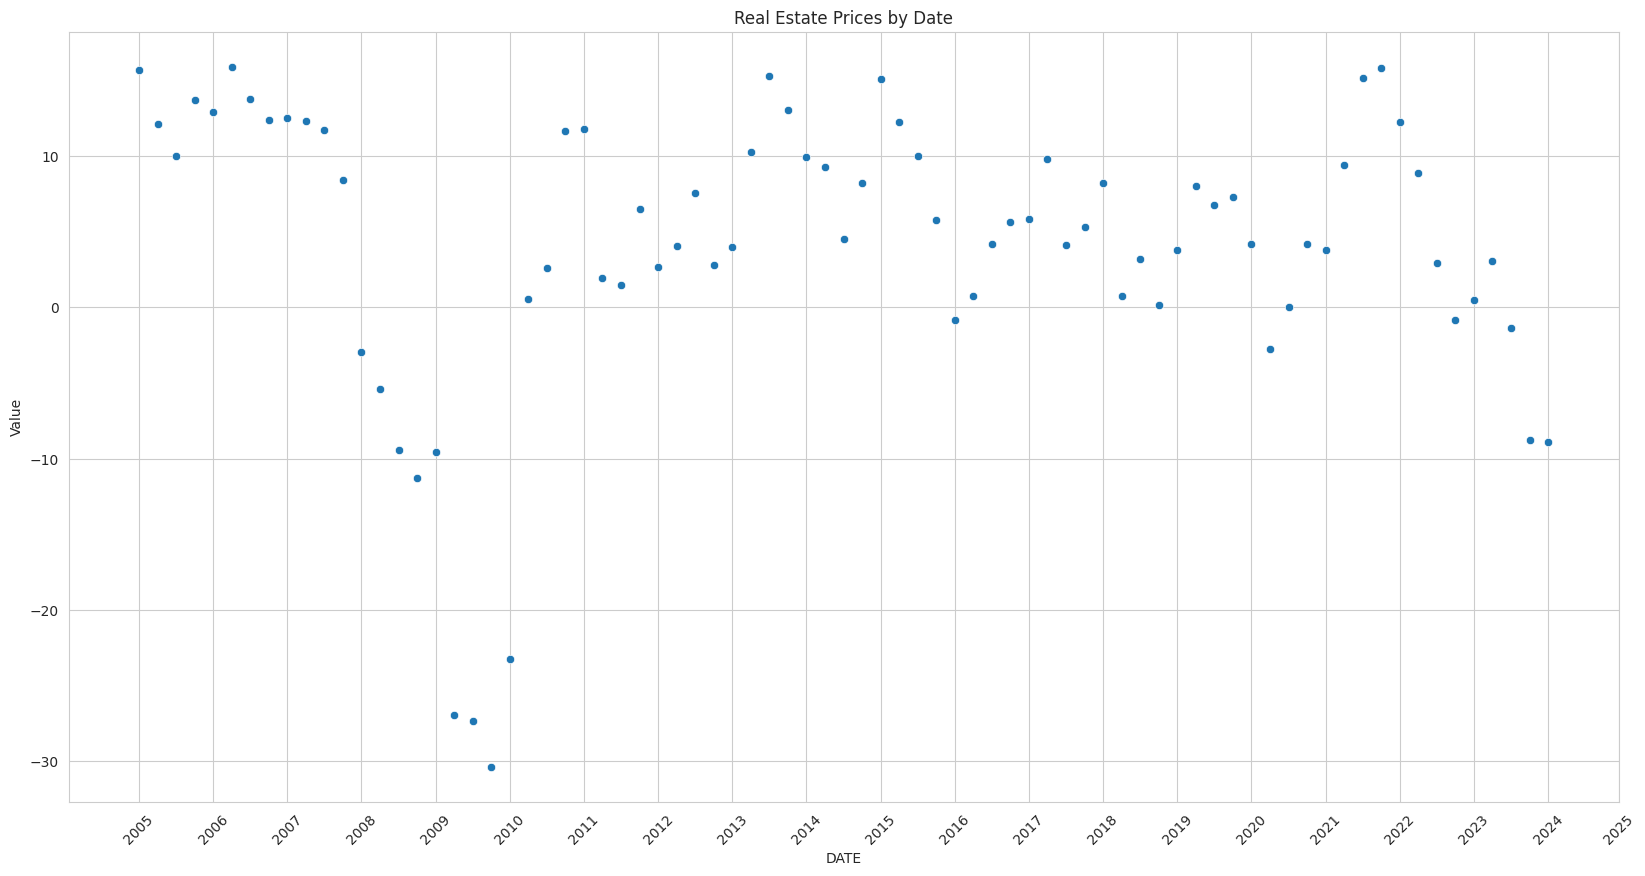

In [31]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 79.8],
           labels = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(ComRealPri, x = ComRealPri.columns[0], y = ComRealPri.columns[1])
plt.title('Real Estate Prices by Date')

This dataset is far less consistent than any of the other datasets. There is little grouping of points and values jump erratically. This is likely because the dataset is small and takes measurements less often that the others. One interesting detail about this dataset is it has a massive dip around 2008-2010, these could be considered outliers with how extreme some of them are, but I prefer to call them the 2008 mortgage crisis.

## Sticky Price
Lastly, we will scatter plot our Sticky Price dataset.

Text(0.5, 1.0, 'Sticky Price: Inflation by Date')

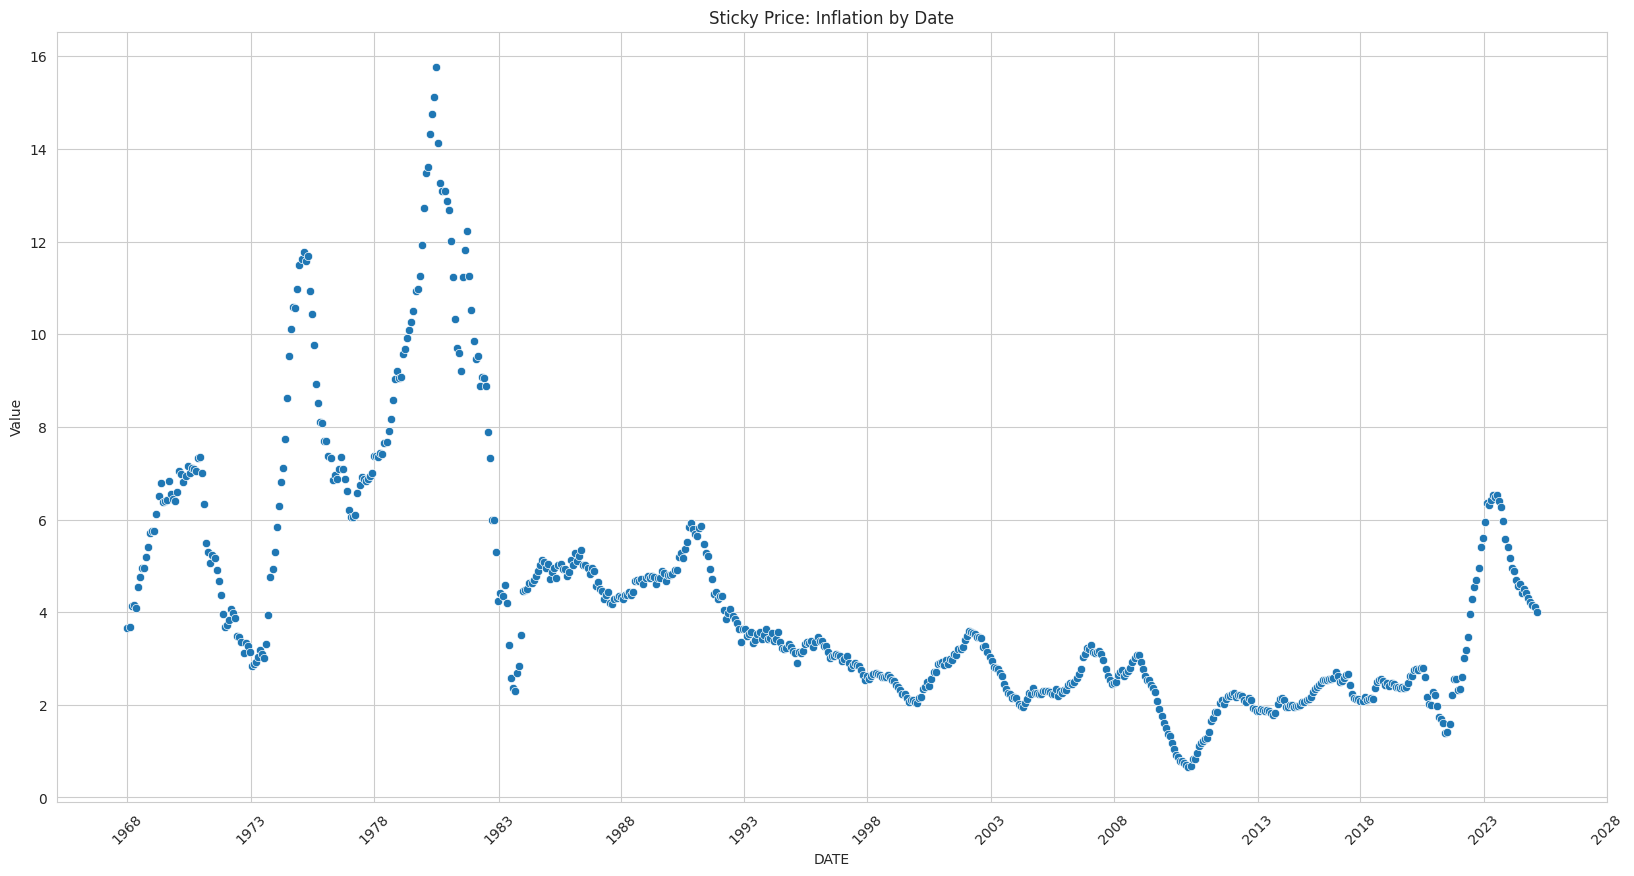

In [32]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 59.5, 119, 179.5, 238, 297.5, 357, 416.5, 476, 545.5, 595, 654.5, 714],
           labels = ["1968", "1973", "1978", "1983", "1988", "1993", "1998", "2003", "2008", "2013", "2018", "2023", "2028"])
sns.scatterplot(StickyPrice, x = StickyPrice.columns[0], y = StickyPrice.columns[1])
plt.title('Sticky Price: Inflation by Date')

Sticky price is the most erratic of the consistent datasets. It definitely follows a trend with multiple points going towards those trends, but it bounces up and down far more than the other datasets have.

## Conclusion
We have some good data to go through, although we will likely not use sticky price for anything but demonstrating the difference in graphs that are not indexed vs those that are. The majority of our datasets are indexs, which does make direct analysis a bit more difficult.

# Regression


# (1) Linear Regression ***Describe your code in the text cell for these please***
Our first step in evaluation is for us to develop a linear regression model using two attributes. The attributes we've chosen are ***INSERT ATTRIBUTES***. We will also measure the performance of the model to ensure it has high performance. We will draw a plot using matplotlib. Lastly, we will calculate and show our loss functions: mean squared error, root mean squared error, and mean absolute error.

## Glass Price Index vs StickyPrice
The following graph shows how glass prices compare to inflation from our StickyPrice dataset. However unlike most of our other data, StickPrice is not an index of inflation, it's the actual percentage, so the comparison is very sloppy.

Text(0, 0.5, 'Glass Price Index')

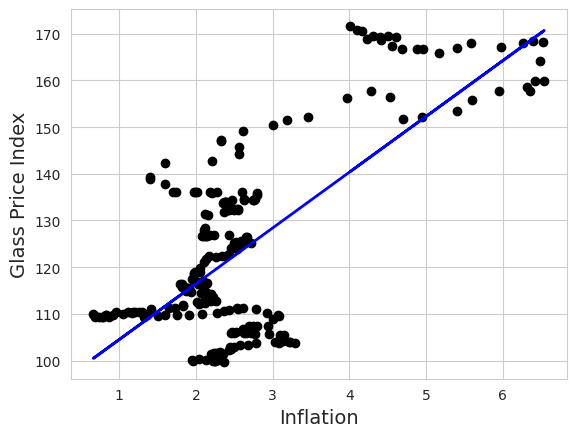

In [33]:
# The uses inflation as a percentage not an index so this is just an example and not a proper comparison

# Store relevant columns as variables
StickyPrice1 = StickyPrice[StickyPrice[cN7[0]] >= "2003-12-01"]
X = StickyPrice1[[cN7[1]]].values.reshape(-1, 1)
y = PPI_Glass[[cN[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation', fontsize=14)
plt.ylabel('Glass Price Index', fontsize=14)

## Glass Price Index vs Inflation
This one lines up much better, and shows that glass prices in this context, are strongly linked to inflation.

Text(0, 0.5, 'Glass Price Index')

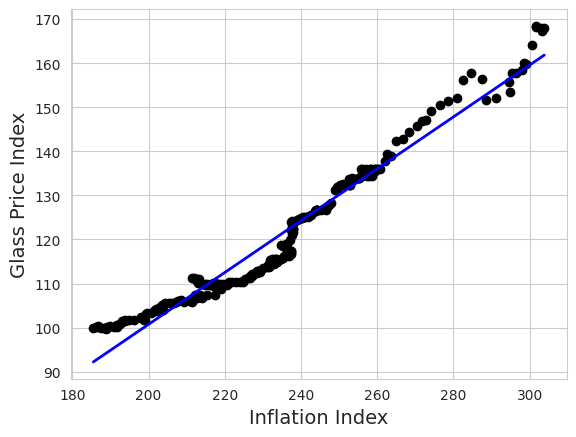

In [34]:
# Store relevant columns as variables
Inflation1 = Inflation[Inflation[cN6[0]] >= "2003-12-01"]
PPI_Glass1 = PPI_Glass[PPI_Glass[cN[0]] <= "2023-06-01"]
X = Inflation1[[cN6[1]]].values.reshape(-1, 1)
y = PPI_Glass1[[cN[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Glass Price Index', fontsize=14)

## Lumber vs Inflation
We have more than just glass, let's compare lumber prices to inflation. It seems to align quite well.

Text(0, 0.5, 'Lumber Price Index')

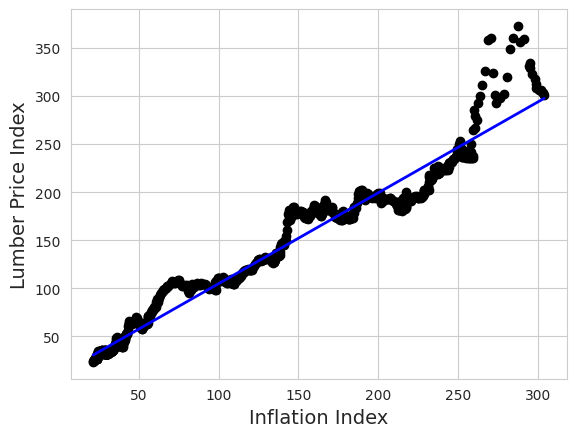

In [35]:
# Store relevant columns as variables
Inflation1 = Inflation[(Inflation[cN6[0]] <= "2023-06-01") & (Inflation[cN6[0]] >= "1947-01-01")] # Select data within the specified date range
PPI_Lumber1 = PPI_Lumber[(PPI_Lumber[cN[0]] <= "2023-06-01") & (PPI_Lumber[cN[0]] >= "1947-01-01")]
X = Inflation1[[cN6[1]]].values.reshape(-1, 1)
y = PPI_Lumber1[[cN1[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Lumber Price Index', fontsize=14)

## Asphalt & Shingles vs Inflation
This one had quite the dip, but generally matches a linear regression.

Text(0, 0.5, 'Asphalt Price Index')

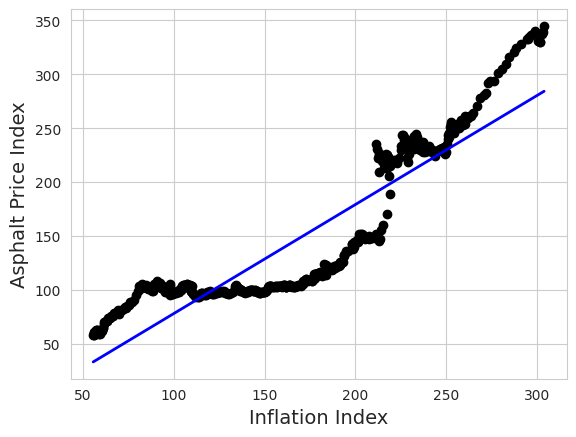

In [36]:
# Store relevant columns as variables
Inflation1 = Inflation[(Inflation[cN6[0]] >= "1975-12-01")]
PPI_Asphalt1 = PPI_Asphalt[(PPI_Asphalt[cN2[0]] <= "2023-06-01")]
X = Inflation1[[cN6[1]]].values.reshape(-1, 1)
y = PPI_Asphalt1[[cN2[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Asphalt Price Index', fontsize=14)

## Cement & Concrete vs Inflation
This matches a linear regression very well indicating a high correlation with inflation

Text(0, 0.5, 'Cement Price Index')

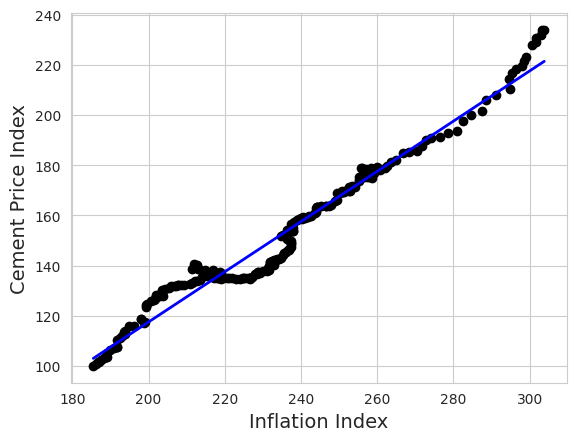

In [37]:
# Store relevant columns as variables
Inflation1 = Inflation[(Inflation[cN6[0]] >= "2003-12-01")]
PPI_Cement1 = PPI_Cement[(PPI_Cement[cN3[0]] <= "2023-06-01")]
X = Inflation1[[cN6[1]]].values.reshape(-1, 1)
y = PPI_Cement1[[cN3[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Cement Price Index', fontsize=14)

## Metal vs Inflation
Just like the others, there are some inconsistencies but generally match the inflation index well and perform well in terms of linear regression

Text(0, 0.5, 'Metals Price Index')

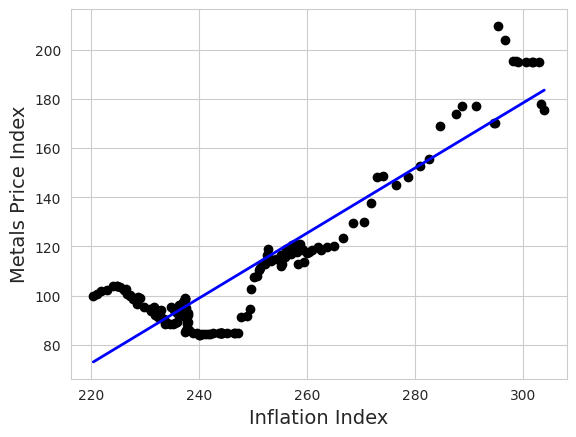

In [38]:
# Store relevant columns as variables
Inflation1 = Inflation[(Inflation[cN6[0]] <= "2023-06-01") & (Inflation[cN6[0]] >= "2010-12-01")]
PPI_Metals1 = PPI_Metals[(PPI_Metals[cN5[0]] <= "2023-06-01")]
X = Inflation1[[cN6[1]]].values.reshape(-1, 1)
y = PPI_Metals1[[cN5[1]]].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Metals Price Index', fontsize=14)

# (2) Multiple Linear Regression
Our second step is to create a multiple linear regression model using multiple attributes. We will go over the attributes used before each of there respectives secions. We will also measure the models performance. We will plot these using mplot3d to show the observed and predicted values from the model. Lastly, we will calculate the loss functions: mean squared error, root mean squared error, and mean absolure error.

## The Regression
The code below is the bulk of this section, as I set up everything for the remaining plots within it. First I created "dummy" datasets to mess with to leave the originals untouched, I then made it dummy datasets first column name consistent and converted it to datetime format. I then combined all of these datesets into a single new dataset, ensuring the dates stayed properly aligned. I then chopped everything before 2010 from the dataset, because our dataset that began gathering data the latest is the metal's dataset, which began 12-01-2010. Although I don't believe there was any NaN data remaining, I still did use a interpolation technique to fill in missing values. I then split the dates from our combined dataset to place them into our 'y' for regression. I then split the data into test and train, and trained the model. Before the graph I went ahead and calculated our performance data. Then finaly I graphed specifically Lumber cost and Glass cost against Inflation in a 3D plot.

In [39]:
#First I copied the original dataframes into one that I will edit
#Then I renamed the columns of these dataframes to prevent overlap
#Lastly for each frame I also ensured the Date columns is dtype datetime

Glass = PPI_Glass
Glass.rename(columns = {"DATE": "Date", 'Price': 'Glass$'}, inplace = True)
Glass['Date'] = pd.to_datetime(Glass['Date'])

Lumber = PPI_Lumber
Lumber.rename(columns = {"DATE": "Date", 'Price': 'Lumber$'}, inplace = True)
Lumber['Date'] = pd.to_datetime(Lumber['Date'])


Asphalt = PPI_Asphalt
Asphalt.rename(columns = {"DATE": "Date", 'Price': 'Asphalt$'}, inplace = True)
Asphalt['Date'] = pd.to_datetime(Asphalt['Date'])


Cement = PPI_Cement
Cement.rename(columns = {"DATE": "Date", 'Price': 'Cement$'}, inplace = True)
Cement['Date'] = pd.to_datetime(Cement['Date'])


Metals = PPI_Metals
Metals.rename(columns = {"DATE": "Date", 'Price': 'Metals$'}, inplace = True)
Metals['Date'] = pd.to_datetime(Metals['Date'])


Plumbing = PPI_Plumbing
Plumbing.rename(columns = {"DATE": "Date", 'Price': 'Plumbing$'}, inplace = True)
Plumbing['Date'] = pd.to_datetime(Plumbing['Date'])

InflationIndex = Inflation
InflationIndex.rename(columns = {"date": "Date", 'value': 'InflationIndex'}, inplace = True)
InflationIndex['Date'] = pd.to_datetime(InflationIndex['Date'])

#Now I combined all of the above dataframes into a single dataframe so that I could more easily, re-size and align values
PPI_All = [Glass, Lumber, Asphalt, Cement, Metals, Plumbing, InflationIndex]
PPI_AllMerg = reduce(lambda left, right: pd.merge(left, right, on=['Date'], how='outer'), PPI_All)
PPI_AllMerg.set_index('Date', inplace=True)

#The metals dataframe starts recording at the latest point, so I chopped everything before 2010-12-01, which is when the first entry in metals is
PPI_AllMerg = PPI_AllMerg[PPI_AllMerg.index >= pd.to_datetime('2010-12-01')]
#print(Metals)
#Filling in any missing values between datasets using interpolation
for column in PPI_AllMerg.columns:
    if column != 'Date':
        PPI_AllMerg[column] = PPI_AllMerg[column].interpolate(method='time')

#Now splitting into two frames for our linear model
X = PPI_AllMerg[['Glass$', 'Lumber$', 'Asphalt$', 'Cement$', 'Metals$', 'Plumbing$']]
y = PPI_AllMerg['InflationIndex']

#Setting up the linear model
linmodel = linear_model.LinearRegression()
#Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Actually fitting the model
linmodel.fit(X_train, y_train)

#Prediction
y_pred = linmodel.predict(X_test)

#Performance Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Printion out my performance evaluation
print(f"R-squared:               {r2}")
print(f"Mean Squared Error:      {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error:     {mae}")

print("The R^2, MSE, RMSE, and MAE all show strong model performance")

R-squared:               0.9963834389686603
Mean Squared Error:      1.8851851370901358
Root Mean Squared Error: 1.3730204430707271
Mean Absolute Error:     1.195165485372508
The R^2, MSE, RMSE, and MAE all show strong model performance


## Lumber & Glass vs Inflation
Finally showing off some plots from all of our above code

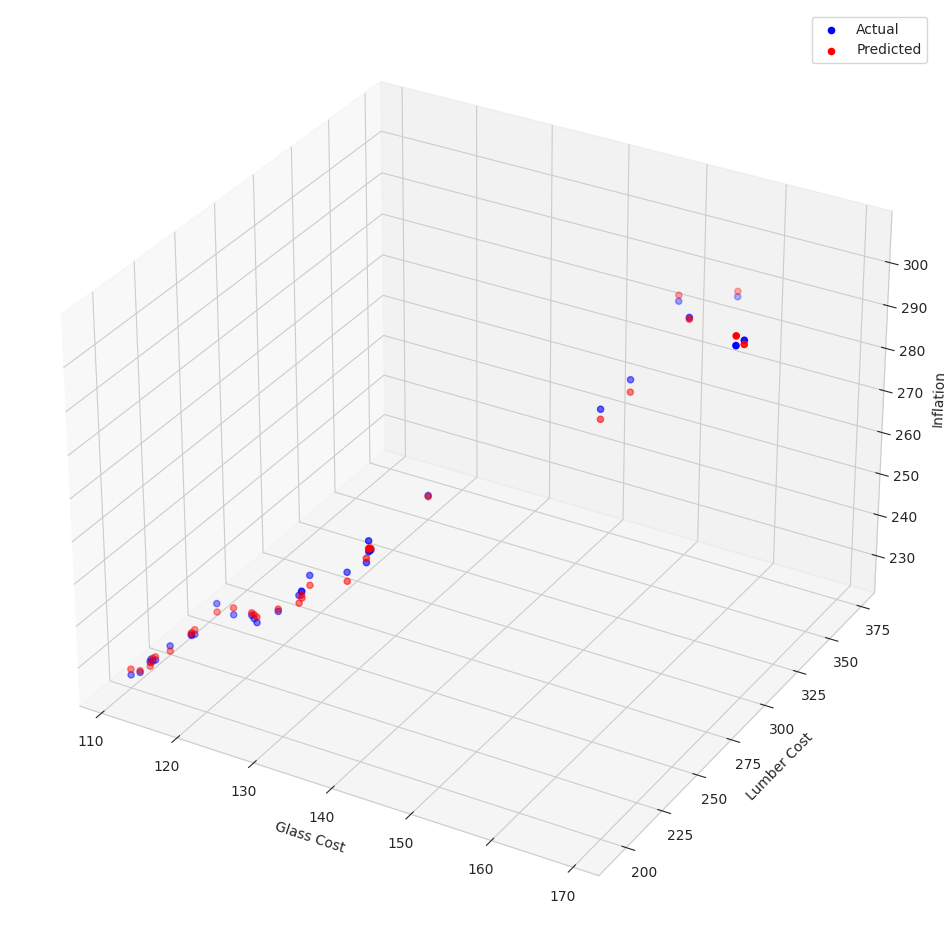

In [40]:
#Setting up the 3D plot
fig = plt.figure(figsize=(20, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Glass$'], X_test['Lumber$'], y_test, c='blue', marker='o', label='Actual')
ax.scatter(X_test['Glass$'], X_test['Lumber$'], y_pred, c='red', marker='o', label='Predicted')
ax.set_xlabel('Glass Cost')
ax.set_ylabel('Lumber Cost')
ax.set_zlabel('Inflation')
ax.legend()

plt.show()

## Asphalt & Cement vs Inflation
More graphs

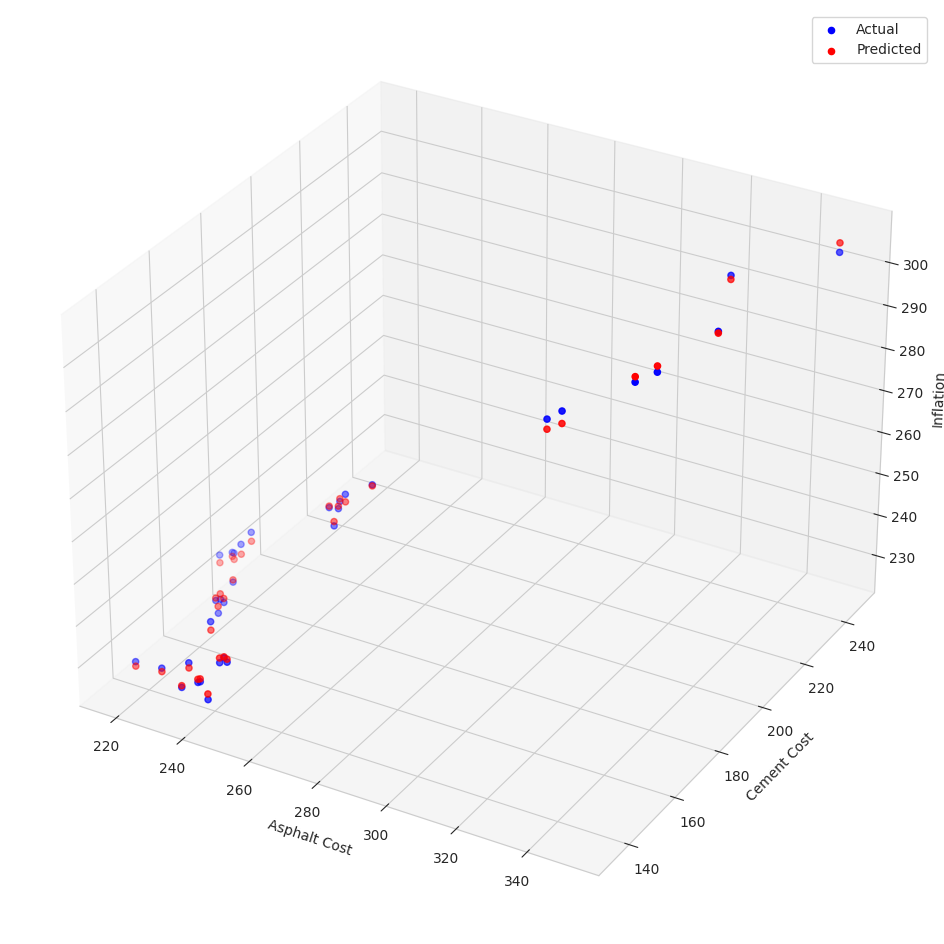

In [41]:
fig = plt.figure(figsize=(20, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Asphalt$'], X_test['Cement$'], y_test, c='blue', marker='o', label='Actual')
ax.scatter(X_test['Asphalt$'], X_test['Cement$'], y_pred, c='red', marker='o', label='Predicted')
ax.set_xlabel('Asphalt Cost')
ax.set_ylabel('Cement Cost')
ax.set_zlabel('Inflation')
ax.legend()

plt.show()

## Metals & Plumbing vs Inflation
Our last 3D graph for this notebook

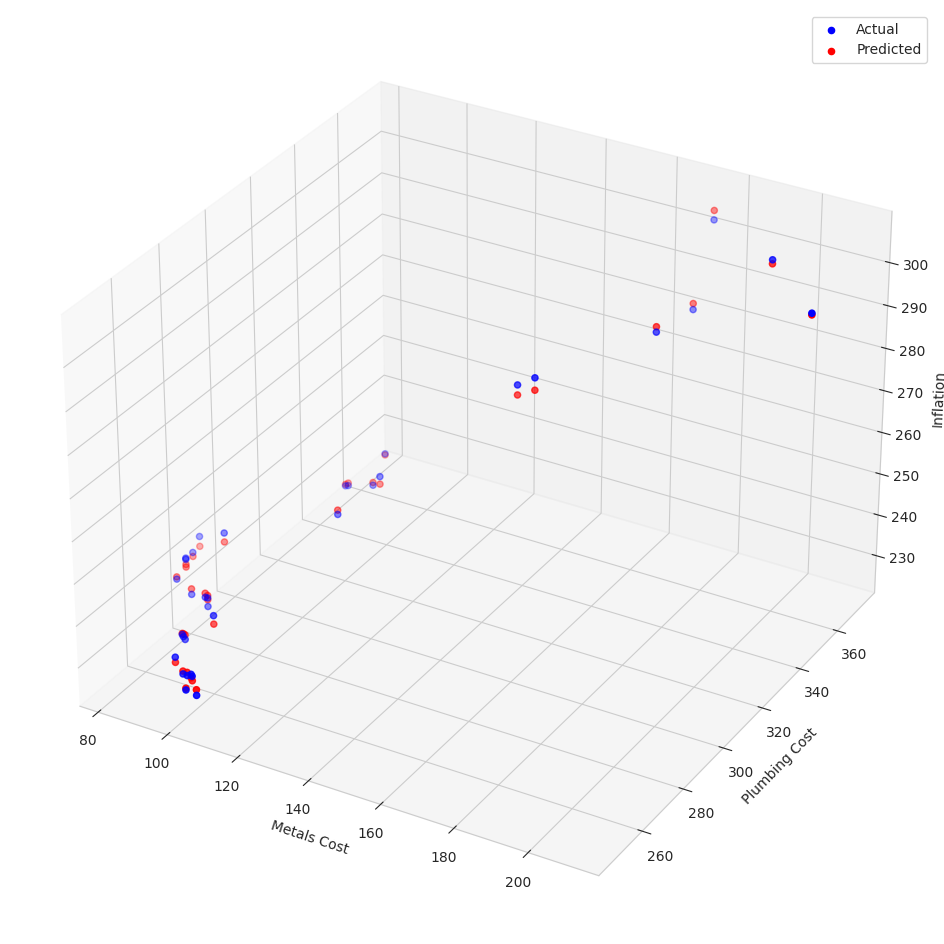

In [42]:
fig = plt.figure(figsize=(20, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Metals$'], X_test['Plumbing$'], y_test, c='blue', marker='o', label='Actual')
ax.scatter(X_test['Metals$'], X_test['Plumbing$'], y_pred, c='red', marker='o', label='Predicted')
ax.set_xlabel('Metals Cost')
ax.set_ylabel('Plumbing Cost')
ax.set_zlabel('Inflation')
ax.legend()

plt.show()

# (3) Logistic Regression
For our third step, we will create a logistical regression. We will measure it's performance and draw a plot using matplotlib to show our observed and predicted values. Lastly, we will report our absolute loss and log loss.

## Logistical Model Code
First I created a new dataset PerChan (Percent Chance), I calculated the percent change in price from point to point across the datsets, then summed them all up to get an overall percentage price change for all materials. Then the logistical model is focused on whether price increased or decreased. Since this included all of our material data, there is only one graph.

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.82      0.90      0.86        10

    accuracy                           0.91        34
   macro avg       0.89      0.91      0.90        34
weighted avg       0.92      0.91      0.91        34

The only score I am somewhat dissapointed in is my f1-score, the others all being above 90 indidcates high enough performance to me


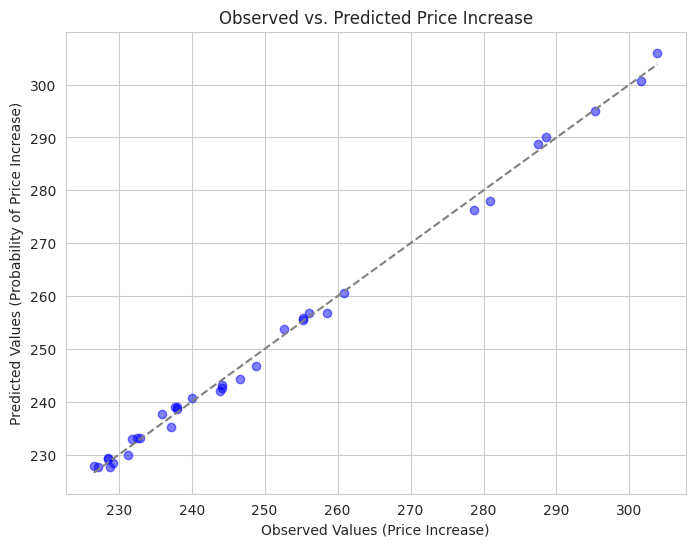

In [43]:
PerChan = PPI_AllMerg.copy()
PerChan['Glass$'] = PerChan['Glass$'].pct_change() * 100
PerChan['Lumber$'] = PerChan['Lumber$'].pct_change() * 100
PerChan['Asphalt$'] = PerChan['Asphalt$'].pct_change() * 100
PerChan['Cement$'] = PerChan['Cement$'].pct_change() * 100
PerChan['Metals$'] = PerChan['Metals$'].pct_change() * 100
PerChan['Plumbing$'] = PerChan['Plumbing$'].pct_change() * 100
PerChan['InflationIndex'] = PerChan['InflationIndex'].pct_change() * 100

PerChan = PerChan.fillna(0)

material_columns = [col for col in PerChan.columns if col != 'Date']
PerChan['Overall%Δ'] = PerChan[material_columns].sum(axis=1)

PerChan['price_increase'] = (PerChan['Overall%Δ'] > 2).astype(int)
Xlog = PerChan[['Glass$', 'Lumber$', 'Asphalt$', 'Cement$', 'Metals$', 'Plumbing$']]
ylog = PerChan['price_increase']

Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(Xlog, ylog, test_size=0.2, random_state=42)
logmodel = linear_model.LogisticRegression()
logmodel.fit(Xlog_train, ylog_train)

ylog_pred = logmodel.predict(Xlog_test)

accuracy = accuracy_score(ylog_test, ylog_pred)
report = classification_report(ylog_test, ylog_pred)
print(report)
print("The only score I am somewhat dissapointed in is my f1-score, the others all being above 90 indidcates high enough performance to me")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.xlabel("Observed Values (Price Increase)")
plt.ylabel("Predicted Values (Probability of Price Increase)")
plt.title("Observed vs. Predicted Price Increase")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')

plt.show()
#print(PerChan)

The results of the logistic regression model were very good and showed a strong relationship

# Conclusion
The logistical model is showing good results at predicting price increases, although the relationship is still linear.
The Multiple Linear Regression model also showed promising results in it's performance and generated graphs.

# (4) Cross-Validation Techniques
Now we will apply some cross-validation techniques to our above models and compare the results with our simple train-test splits

First I copied what I did in part 1 with the exception of the loss functions, and then split the data before doing a cross-validation below.

Text(0, 0.5, 'Glass Price Index')

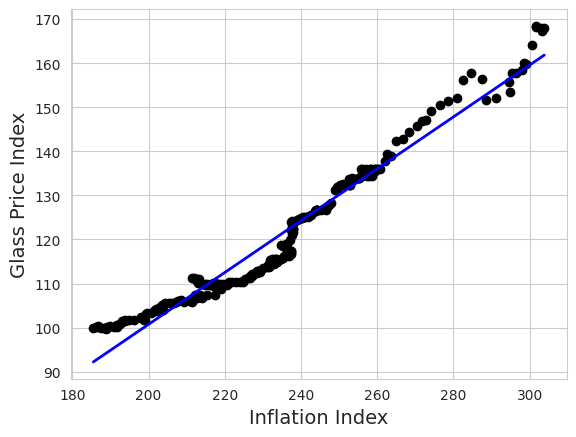

In [44]:
# I will use the glass vs inflation regression

# Store relevant columns as variables
Inflation1 = Inflation[Inflation['Date'] >= "2003-12-01"]
PPI_Glass1 = PPI_Glass[PPI_Glass['Date'] <= "2023-06-01"]
X = Inflation1[['InflationIndex']].values.reshape(-1, 1)
y = PPI_Glass1[['Glass$']].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Glass Price Index', fontsize=14)

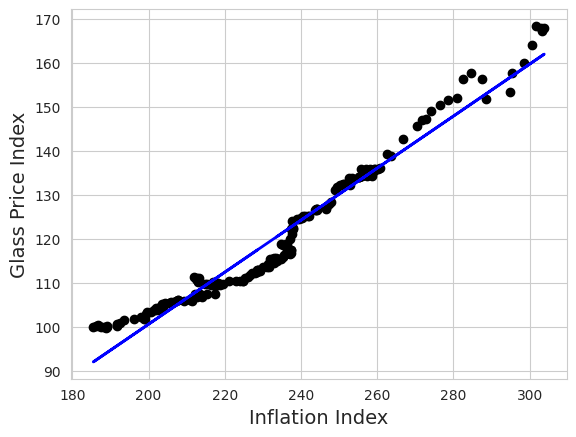

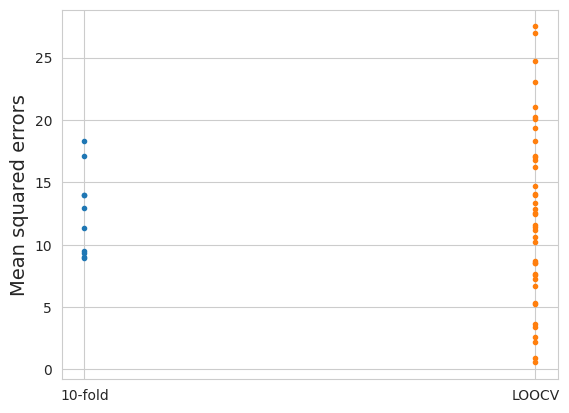

In [45]:
# cross-validation

# Split off 20% of the data to be left out as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X_train, y_train)
yPredicted = linModel.predict(X_train)

# Graph the model
plt.figure(1)
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Glass Price Index', fontsize=14)

# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores = -cross_val_score(linModel, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
LOOCV_scores = -cross_val_score(linModel, X_train, y_train, scoring='neg_mean_squared_error', cv=40)

# Plot the errors for both scores
plt.figure(2)
plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14);
plt.xticks([0, 1], ['10-fold', 'LOOCV']);

LOOCV has a mean squared error closer to zero but also has a much wider variance

Now I copied an example from part 2, then split the data and did a cross-validation below.

In [46]:
#Now splitting into two frames for our linear model
X = PPI_AllMerg[['Glass$', 'Lumber$', 'Asphalt$', 'Cement$', 'Metals$', 'Plumbing$']]
y = PPI_AllMerg['InflationIndex']

#Setting up the linear model
linmodel = linear_model.LinearRegression()
#Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Actually fitting the model
linmodel.fit(X_train, y_train)

#Prediction
y_pred = linmodel.predict(X_test)

# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores = -cross_val_score(linModel, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
LOOCV_scores = -cross_val_score(linModel, X_train, y_train, scoring='neg_mean_squared_error', cv=40)

# Plot the errors for both scores
#plt.figure(3)
#plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
#plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
#plt.ylabel('Mean squared errors', fontsize=14);
#plt.xticks([0, 1], ['10-fold', 'LOOCV']);

LOOCV has a smaller minimum mean squared error but a much wider variance compared to 10-fold

Now I copied an example from part 3 and repeated again what i did above

In [47]:
PerChan = PPI_AllMerg.copy()
PerChan['Glass$'] = PerChan['Glass$'].pct_change() * 100
PerChan['Lumber$'] = PerChan['Lumber$'].pct_change() * 100
PerChan['Asphalt$'] = PerChan['Asphalt$'].pct_change() * 100
PerChan['Cement$'] = PerChan['Cement$'].pct_change() * 100
PerChan['Metals$'] = PerChan['Metals$'].pct_change() * 100
PerChan['Plumbing$'] = PerChan['Plumbing$'].pct_change() * 100
PerChan['InflationIndex'] = PerChan['InflationIndex'].pct_change() * 100

PerChan = PerChan.fillna(0)

material_columns = [col for col in PerChan.columns if col != 'Date']
PerChan['Overall%Δ'] = PerChan[material_columns].sum(axis=1)

PerChan['price_increase'] = (PerChan['Overall%Δ'] > 2).astype(int)
Xlog = PerChan[['Glass$', 'Lumber$', 'Asphalt$', 'Cement$', 'Metals$', 'Plumbing$']]
ylog = PerChan['price_increase']

Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(Xlog, ylog, test_size=0.2, random_state=42)
logmodel = linear_model.LogisticRegression()
logmodel.fit(Xlog_train, ylog_train)

ylog_pred = logmodel.predict(Xlog_test)


# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores = -cross_val_score(linModel, Xlog_train, ylog_train, scoring='neg_mean_squared_error', cv=10)

# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
LOOCV_scores = -cross_val_score(linModel, Xlog_train, ylog_train, scoring='neg_mean_squared_error', cv=40)

# Plot the errors for both scores
#plt.figure(5)
#plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
#plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
#plt.ylabel('Mean squared errors', fontsize=14);
#plt.xticks([0, 1], ['10-fold', 'LOOCV']);
#plt.show()

Except for a single outlier for both 10-fold and LOOCV the mean-dquared errors are close to zero and the variance is small

# (5) Bootstrap Method
We will apply the Bootstrap method to one of our models and report the error mean and standard deviation.

In [48]:
bootstrapErrors = []
for i in range(0, 30):
    # Create the bootstrap sample and the out-of-bag sample
    boot = resample(PPI_AllMerg, replace=True, n_samples=51)
    oob = PPI_AllMerg[~PPI_AllMerg.index.isin(boot.index)]

    # Fit a linear model to the bootstrap sample
    XBoot = boot[['Glass$']].values.reshape(-1, 1)
    yBoot = boot[['InflationIndex']].values.reshape(-1, 1)
    linModel = LinearRegression()
    linModel.fit(XBoot, yBoot)

    # Predict y values for the out-of-bag sample
    XOob = oob[['Glass$']].values.reshape(-1, 1)
    YOob = oob[['InflationIndex']].values.reshape(-1, 1)
    YOobPredicted = linModel.predict(XOob)

    # Calculate the error
    bootError = mean_squared_error(YOob, YOobPredicted)
    bootstrapErrors.append(bootError)

# Calculate the mean of the errors
np.mean(bootstrapErrors)

# Calculate the standard deviation of the errors
np.std(bootstrapErrors)

# Plot the errors
#plt.plot(bootstrapErrors, np.zeros_like(bootstrapErrors), '.')
#plt.xlabel('Bootstrap errors (MSE)', fontsize=14)
#plt.gca().axes.yaxis.set_ticks([]);

0.8617076117306058

The bootstrap errors congregate around 10 with most being within 9-12 but some outliers outside of that range

# (6) Comparing Models
We will compare our models using one-standard-error or adjusted-R-squared methods

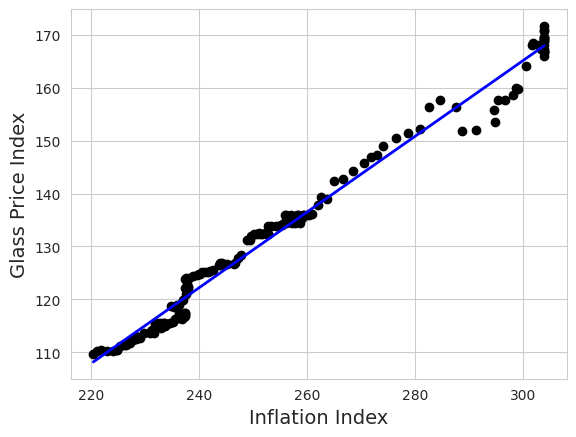

In [49]:
# Store relevant columns as variables
X = PPI_AllMerg[['InflationIndex']].values.reshape(-1, 1)
y = PPI_AllMerg[['Glass$']].values.reshape(-1, 1)

# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Inflation Index', fontsize=14)
plt.ylabel('Glass Price Index', fontsize=14)

# acquire adjusted R-squared
linR2 = 1 - (1-linModel.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.82      0.90      0.86        10

    accuracy                           0.91        34
   macro avg       0.89      0.91      0.90        34
weighted avg       0.92      0.91      0.91        34

The only score I am somewhat dissapointed in is my f1-score, the others all being above 90 indidcates high enough performance to me


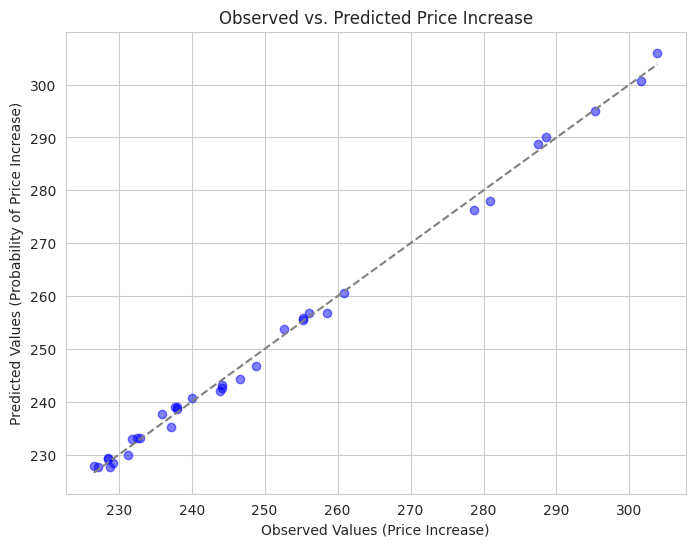

In [50]:
PerChan = PPI_AllMerg.copy()
PerChan['Glass$'] = PerChan['Glass$'].pct_change() * 100
PerChan['Lumber$'] = PerChan['Lumber$'].pct_change() * 100
PerChan['Asphalt$'] = PerChan['Asphalt$'].pct_change() * 100
PerChan['Cement$'] = PerChan['Cement$'].pct_change() * 100
PerChan['Metals$'] = PerChan['Metals$'].pct_change() * 100
PerChan['Plumbing$'] = PerChan['Plumbing$'].pct_change() * 100
PerChan['InflationIndex'] = PerChan['InflationIndex'].pct_change() * 100

PerChan = PerChan.fillna(0)

material_columns = [col for col in PerChan.columns if col != 'Date']
PerChan['Overall%Δ'] = PerChan[material_columns].sum(axis=1)

PerChan['price_increase'] = (PerChan['Overall%Δ'] > 2).astype(int)
Xlog = PerChan[['Glass$', 'Lumber$', 'Asphalt$', 'Cement$', 'Metals$', 'Plumbing$']]
ylog = PerChan['price_increase']

Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(Xlog, ylog, test_size=0.2, random_state=42)
logmodel = linear_model.LogisticRegression()
logmodel.fit(Xlog_train, ylog_train)

ylog_pred = logmodel.predict(Xlog_test)

accuracy = accuracy_score(ylog_test, ylog_pred)
report = classification_report(ylog_test, ylog_pred)
print(report)
print("The only score I am somewhat dissapointed in is my f1-score, the others all being above 90 indidcates high enough performance to me")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.xlabel("Observed Values (Price Increase)")
plt.ylabel("Predicted Values (Probability of Price Increase)")
plt.title("Observed vs. Predicted Price Increase")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')

plt.show()

# acquire adjusted R-squared
logR2 = 1 - (1-logmodel.score(Xlog_train, ylog_train))*(len(ylog_train)-1)/(len(ylog_train)-Xlog_train.shape[1]-1)

In [51]:
print('Linear Regression Adjusted R squared value: ', linR2)
print('Logistic Regression Adjusted R squared value: ', logR2)

Linear Regression Adjusted R squared value:  0.9853965702598113
Logistic Regression Adjusted R squared value:  0.9682424242424242


The Linear Regression has a bigger Adjusted R Squared indicating a better performance but the values are both high and close so the difference is not big

# Conclusion

I found that our cross-validation yielded consistent results regardless of the model with the LOOCV having a greater variance but at times having values closer to zero while 10-fold was much less varied but not a close to zero. The bootstrap method also showed we had a lower mean squared error with it being around 9-12. Comparing models also showed how both our linear and logarithmic regression fit well and worked well with the linear model proving to be slightly better.

# Unsupervised Learning
For our unsupervised learning algorithm, We are going to use K-Means Clustering(KMC). I am going to apply KMC to our Zillow dataset.

## Preprocessing: Filling in NaN
The first problem I needed to fix is that the Zillow dataset has large amounts of data missing for the beginning period of four states. All other states began getting values in January of 2000, however Wyoming and New Mexico didn't start getting values until March of 2002, Montana didn't until February of 2005, and North Dakota didn't until January 2009. This is to many missing values for interpolation to deal with. To solve this, I took the recorded values of other states and compared them to the recorded values of the state missing its beginning values. I then set the large amounts of NaN data from each offending state equal to the state that its recorded values most closely followed.

In [52]:
ZillowKMC = Zillow.copy()
ZillowKMC['Date'] = pd.to_datetime(ZillowKMC['Date'])
ZillowKMC.set_index('Date', inplace=True)
ZillowKMC = ZillowKMC.interpolate(method='time', direction='both')

for state_col in ZillowKMC.columns[1:]:
    if ZillowKMC[state_col].isnull().any():
        print(f"NaNs still present in {state_col}")

print("-" * 20)

ZillowKMC_truncated = ZillowKMC.loc['2002-04-01':]
distances = {}

for state in ZillowKMC_truncated.columns[1:]:
  if state != 'New Mexico' and state != 'Montana' and state != 'North Dakota' and state != 'Wyoming':
    state_prices = ZillowKMC_truncated[state].dropna().values
    New_Mexico_prices = ZillowKMC_truncated['New Mexico'].dropna().values
    distances[state] = euclidean(New_Mexico_prices, state_prices)

NMClosest = (min(distances, key=distances.get))
distances = {}

for state in ZillowKMC_truncated.columns[1:]:
  if state != 'New Mexico' and state != 'Montana' and state != 'North Dakota' and state != 'Wyoming':
    state_prices = ZillowKMC_truncated[state].dropna().values
    Wyoming_prices = ZillowKMC_truncated['Wyoming'].dropna().values
    distances[state] = euclidean(Wyoming_prices, state_prices)

WYClosest = (min(distances, key=distances.get))
ZillowKMC_truncated = ZillowKMC.loc['2005-02-01':]
distances = {}

for state in ZillowKMC_truncated.columns[1:]:
  if state != 'Montana' and state != 'North Dakota':
    state_prices = ZillowKMC_truncated[state].dropna().values
    montana_prices = ZillowKMC_truncated['Montana'].dropna().values
    distances[state] = euclidean(montana_prices, state_prices)

MOClosest = (min(distances, key=distances.get))
ZillowKMC_truncated = ZillowKMC.loc['2009-01-01':]
distances = {}

for state in ZillowKMC_truncated.columns[1:]:
  if state != 'North Dakota':
    state_prices = ZillowKMC_truncated[state].dropna().values
    North_Dakota_prices = ZillowKMC_truncated['North Dakota'].dropna().values
    distances[state] = euclidean(North_Dakota_prices, state_prices)

NDClosest = (min(distances, key=distances.get))
distances = {}

for state in ["Montana", "New Mexico", "Wyoming", "North Dakota"]:
  for date in ZillowKMC.index:
    if pd.isna(ZillowKMC.loc[date, state]):
      if state == "New Mexico":
        ZillowKMC.loc[date, state] = ZillowKMC.loc[date, NMClosest]
      if state == "Wyoming":
        ZillowKMC.loc[date, state] = ZillowKMC.loc[date, WYClosest]
      if state == "Montana":
        ZillowKMC.loc[date, state] = ZillowKMC.loc[date, MOClosest]
      if state == "North Dakota":
        ZillowKMC.loc[date, state] = ZillowKMC.loc[date, NDClosest]

print(f"New Mexico's prices were closest to: {NMClosest}")
print(f"Wyoming's prices were closest to: {WYClosest}")
print(f"Montana's prices were closest to: {MOClosest}")
print(f"North Dakota's prices were closest to: {NDClosest}")
print("-" * 20)
NaNdetected = False
for state_col in ZillowKMC.columns[1:]:
    if ZillowKMC[state_col].isnull().any():
        Nandetected = True
if NaNdetected:
  print("NaN values remain")
if not NaNdetected:
  print("No NaN values found")

NaNs still present in Montana
NaNs still present in New Mexico
NaNs still present in North Dakota
NaNs still present in Wyoming
--------------------
New Mexico's prices were closest to: Wisconsin
Wyoming's prices were closest to: Vermont
Montana's prices were closest to: Idaho
North Dakota's prices were closest to: South Dakota
--------------------
No NaN values found


## NaN filled
As the output shows, we have successfully removed all NaN values from our dataset. We show this by iterating through every column and check if isnull().any() is true, if it is, we set the NaNdetected to true, using NaNdetected we output whether or not we removed all NaN values. As shown, No NaN values found.

## Scaling
Now that we have removed all NaN values, we can scale our data to be be more easily used by KMC.

In [53]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
average_prices = pd.DataFrame(ZillowKMC.mean(axis=0), columns=['Average_Price'])
scaler = StandardScaler()
scaled_average_prices = scaler.fit_transform(average_prices)
print(average_prices)
print("-" * 20)
message = f"""
Virgina Scaled: {scaled_average_prices[0, 0]:>10.2f}
California Scaled: {scaled_average_prices[1, 0]:>7.2f}
....                  ....
Iowa Scaled {scaled_average_prices[2, 0]:>14.2f}
Ohio Scaled {scaled_average_prices[3, 0]:>14.2f}
"""
print(message)

                          Average_Price
Virginia                      242488.31
California                    429145.13
Florida                       207179.48
New York                      288656.41
New Jersey                    322526.22
Texas                         170325.95
Michigan                      147371.77
Massachusetts                 365521.56
Arizona                       232819.29
Washington                    318393.98
Colorado                      300602.05
Illinois                      181684.11
the District of Columbia      425316.33
Nevada                        250007.13
Hawaii                        490650.00
New Hampshire                 255204.48
Utah                          270276.40
Georgia                       175742.58
Montana                       229373.62
Minnesota                     213269.06
Louisiana                     158011.20
Maryland                      285947.64
Pennsylvania                  168711.22
South Carolina                168566.25


## Scaled
As shown in the output, we have successfully scaled the dataframe.

## How many clusters
The amount of clusters used is very important to KMC, so we are going to use the Elbow method to obtain the the best number of clusters.

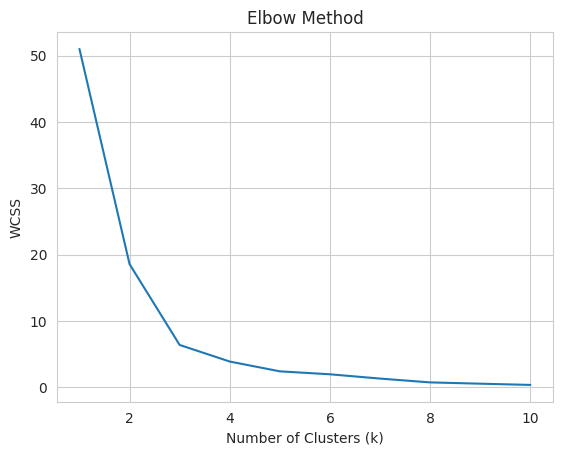

In [54]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_average_prices)
  wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

## Optimal Cluster Number
By inspecting the graph we've generated, we can use the elbow method to determine the best number of clusters. From observation I am going to set the number of clusters at 4.

## Calling KMC
Now we are going to actually call KMeans, we are using the previously determined 4 clusters and a random_state value of 42. We also grabbed the cluster labels and put them into our dataframe.

In [55]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_average_prices)
cluster_labels = kmeans.labels_
average_prices['Cluster'] = cluster_labels

## KMC done
Ran without error, in the following cells we will analyze how well the algorithm performed.

## Clusters
I will also type the clusters here in an easier to read format:
  - Cluster 0: Virgina, Florida, Arizona, Nevada, New Hampshire, Utah, Montana, Minnesota, Vermont, Rhode Island, Alaska, Maine, Idaho, Connecticut, Delaware, and Wyoming
  - Cluster 1: California, Hawaii, and The District of Columbia
  - Cluster 2: New York, New Jersey, Massachusetts, Washington, Colorado, Maryland, and Oregon
  - Cluster 3: Texas, Michigan, Illinois, Georgia, Louisiana, Pennsylvania, South Carolina, North Carolina, Tennessee, New Mexico, Alabama, Wisconsin, Arkansas, Mississippi, Indiana, West Virginia, North Dakota, Kentucky, Mossouri, Kansas, Oklahoma, South Dakota, Nebraska, Iowa, and Ohio

## Scatter Plot
I will make a scatter plot to visualize the clusters, so we can see the groupings. I will also reorder and rename the clusters to be something a bit more meaningfull.

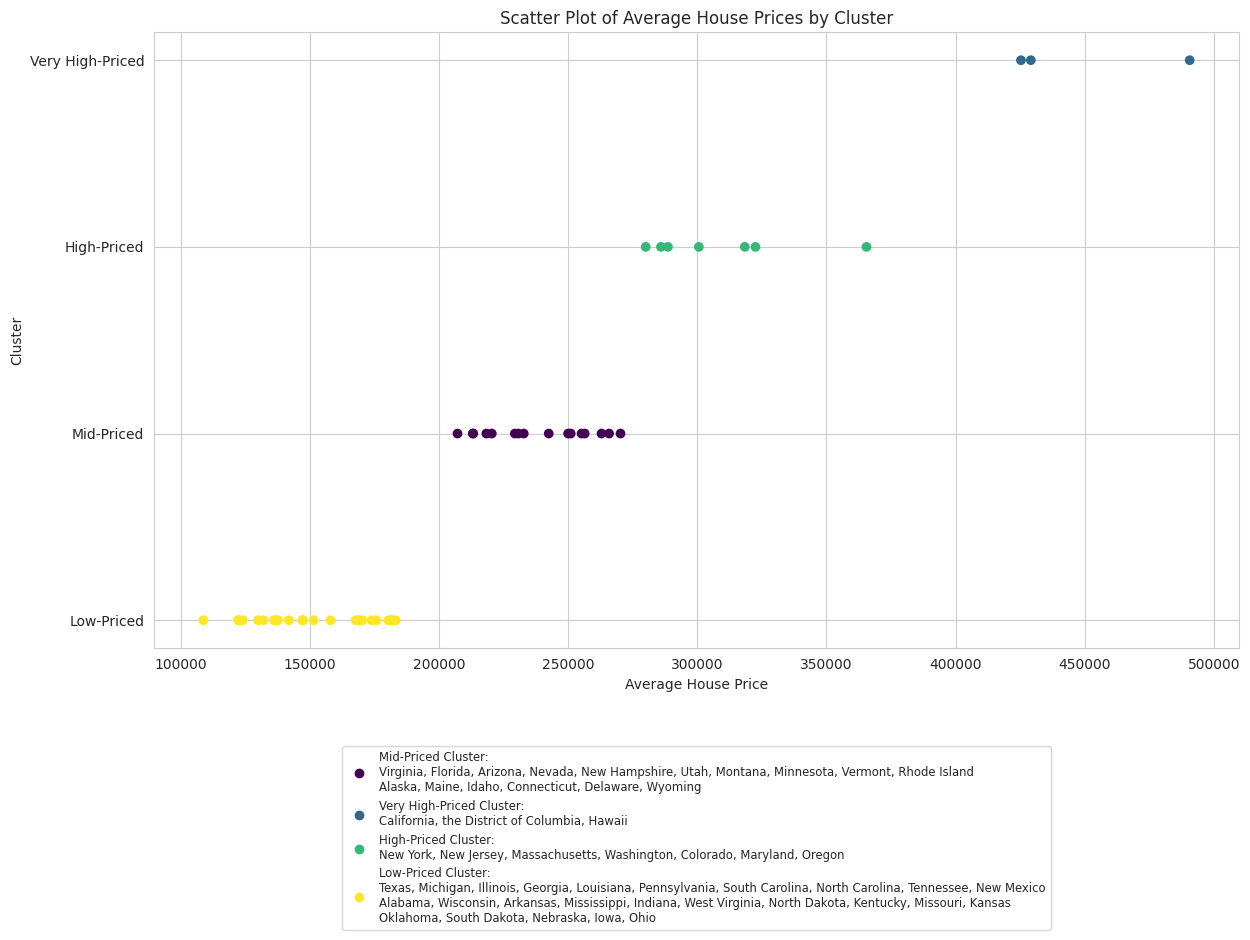

In [56]:
average_prices_reordered = average_prices
plt.figure(figsize=(14, 8))
y_values = average_prices_reordered['Cluster'].copy()
plt.scatter(average_prices_reordered['Average_Price'], y_values,
            c=cluster_labels[:len(average_prices_reordered)], cmap='viridis')
plt.xlabel("Average House Price")
plt.ylabel("Cluster")
plt.title("Scatter Plot of Average House Prices by Cluster")
handles = []
labels = []
cluster_names = {
    0: "Mid-Priced",
    1: "Very High-Priced",
    2: "High-Priced",
    3: "Low-Priced"
}
for cluster_id in range(4):
    cluster_states = average_prices_reordered[average_prices_reordered['Cluster'] == cluster_id].index.tolist()
    chunk_size = 10
    state_chunks = [cluster_states[i:i + chunk_size] for i in range(0, len(cluster_states), chunk_size)]
    label_lines = [f"{cluster_names[cluster_id]} Cluster:"]
    for chunk in state_chunks:
        label_lines.append(', '.join(chunk))
    label = '\n'.join(label_lines)
    labels.append(label)
    h, = plt.plot([], [], linestyle='none', marker='o', color=plt.cm.viridis(cluster_id / 3))
    handles.append(h)

plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize='small', ncol=1)
cluster_order = ['Low-Priced', 'Mid-Priced', 'High-Priced', 'Very High-Priced']
plt.yticks(range(len(cluster_order)), cluster_order)

cluster_mapping = {old_id: cluster_order.index(cluster_names[old_id]) for old_id in range(4)}

average_prices_reordered['Cluster'] = pd.to_numeric(average_prices_reordered['Cluster'])
new_cluster_ids = average_prices_reordered['Cluster'].map(cluster_mapping).values
y_values = y_values[:len(new_cluster_ids)]

y_values_reordered = [y_values[new_cluster_ids == i] for i in range(4)]
y_values_reordered = np.concatenate(y_values_reordered)
plt.gca().collections[0].set_offsets(np.c_[average_prices_reordered['Average_Price'], new_cluster_ids])
plt.show()

## Interpertation
The graph gives us a good view of the cut off points for each grouping.
  - Low Prices:       100,000\$ - 180,000\$
  - Mid Prices:       200,000\$ - 275,000\$
  - High Prices:      276,000\$ - 375,000\$
  - Very High Prices: 425,000\$ - 500,000\$

These are estimated based on the graph. We can however obtain some more precise values for these.


In [57]:
# Calculate the minimum and maximum value of each cluster
zeroCurMin = 1000000
zeroCurMax = -1000000
oneCurMin = 1000000
oneCurMax = -1000000
twoCurMin = 1000000
twoCurMax = -1000000
threeCurMin = 1000000
threeCurMax = -1000000

for i in range(len(average_prices)):
    # Access rows using the index (state names)
    if average_prices.at[average_prices.index[i], 'Cluster'] == 0:
        if average_prices.at[average_prices.index[i], 'Average_Price'] < zeroCurMin:
            zeroCurMin = average_prices.at[average_prices.index[i], 'Average_Price']
        if average_prices.at[average_prices.index[i], 'Average_Price'] > zeroCurMax:
            zeroCurMax = average_prices.at[average_prices.index[i], 'Average_Price']
    elif average_prices.at[average_prices.index[i], 'Cluster'] == 1:
        if average_prices.at[average_prices.index[i], 'Average_Price'] < oneCurMin:
            oneCurMin = average_prices.at[average_prices.index[i], 'Average_Price']
        if average_prices.at[average_prices.index[i], 'Average_Price'] > oneCurMax:
            oneCurMax = average_prices.at[average_prices.index[i], 'Average_Price']
    elif average_prices.at[average_prices.index[i], 'Cluster'] == 2:
        if average_prices.at[average_prices.index[i], 'Average_Price'] < twoCurMin:
            twoCurMin = average_prices.at[average_prices.index[i], 'Average_Price']
        if average_prices.at[average_prices.index[i], 'Average_Price'] > twoCurMax:
            twoCurMax = average_prices.at[average_prices.index[i], 'Average_Price']
    elif average_prices.at[average_prices.index[i], 'Cluster'] == 3:
        if average_prices.at[average_prices.index[i], 'Average_Price'] < threeCurMin:
            threeCurMin = average_prices.at[average_prices.index[i], 'Average_Price']
        if average_prices.at[average_prices.index[i], 'Average_Price'] > threeCurMax:
            threeCurMax = average_prices.at[average_prices.index[i], 'Average_Price']

print(f"Cluster 0: Min = {zeroCurMin}, Max = {zeroCurMax}")
print(f"Cluster 1: Min = {oneCurMin}, Max = {oneCurMax}")
print(f"Cluster 2: Min = {twoCurMin}, Max = {twoCurMax}")
print(f"Cluster 3: Min = {threeCurMin}, Max = {threeCurMax}")

Cluster 0: Min = 207179.48365993553, Max = 270276.4038994282
Cluster 1: Min = 425316.32662167127, Max = 490649.99500384356
Cluster 2: Min = 280049.4811666437, Max = 365521.5618342517
Cluster 3: Min = 108775.4607195297, Max = 183258.5003347146


Note that these were obtained with the out of order dataframe, putting them in the correct order the ranges currently are:
  - Low Price: 108,775\$ - 183259\$
  - Mid Price: 207,179\$ - 270,276\$
  - High Price: 280,049\$ - 365,522\$
  - Very High Price: 425,316\$ - 490,650\$

## Effectiveness of KMC
Now I will evaluate the effectiveness of our KMC. I will go over how it visually looks in the groupings and check the Silhouette score.

## Visual Observation
The graph shows good grouping, there is no overlap in clusters, they are distinct.

## Silhouette Score
Now I will use sklearn.metrics silhouette score to grab the score of our KMC model.

In [58]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_average_prices, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.604


## Interpertation
The score of 0.604 is acceptable. It indicates that there is a reasonable structure to the groupings.

# Supervised Learning
For our supervised learning, I will be using the Support Vector Machine (SMV) algorithm. I will attempt to create a model that predicts house prices based on inflation value overall and the inflation value of individual materials. Thankfully we have already cleaned our zillow dataset for our unsupervised learning.

## Choppping Block
Of our datasets, the one that started gathering data the latest is PPI_Metals, which began gathering in 2010 december. For a proper comparison, we are chopping all the other datasets to line up correctly. So we are only comparing values from the year 2011 until 2024

In [59]:
Inflation['Date'] = pd.to_datetime(Inflation['Date']).dt.strftime('%Y-%m-%d')
PPI_Glass['Date'] = pd.to_datetime(PPI_Glass['Date']).dt.strftime('%Y-%m-%d')
PPI_Lumber['Date'] = pd.to_datetime(PPI_Lumber['Date']).dt.strftime('%Y-%m-%d')
PPI_Asphalt['Date'] = pd.to_datetime(PPI_Asphalt['Date']).dt.strftime('%Y-%m-%d')
PPI_Cement['Date'] = pd.to_datetime(PPI_Cement['Date']).dt.strftime('%Y-%m-%d')
PPI_Plumbing['Date'] = pd.to_datetime(PPI_Plumbing['Date']).dt.strftime('%Y-%m-%d')
PPI_Metals['Date'] = pd.to_datetime(PPI_Metals['Date']).dt.strftime('%Y-%m-%d')

InflationTrun = Inflation[Inflation['Date'] >= '2011-01-01'].copy()
PPI_GlassTrun = PPI_Glass[PPI_Glass['Date'] >= '2011-01-01'].copy()
PPI_LumberTrun = PPI_Lumber[PPI_Lumber['Date'] >= '2011-01-01'].copy()
PPI_AsphaltTrun = PPI_Asphalt[PPI_Asphalt['Date'] >= '2011-01-01'].copy()
PPI_CementTrun = PPI_Cement[PPI_Cement['Date'] >= '2011-01-01'].copy()
PPI_PlumbingTrun = PPI_Plumbing[PPI_Plumbing['Date'] >= '2011-01-01'].copy()
PPI_MetalsTrun = PPI_Metals[PPI_Metals['Date'] >='2011-01-01'].copy()

InflationTrun.set_index('Date', inplace=True)
PPI_GlassTrun.set_index('Date', inplace=True)
PPI_LumberTrun.set_index('Date', inplace=True)
PPI_AsphaltTrun.set_index('Date', inplace=True)
PPI_CementTrun.set_index('Date', inplace=True)
PPI_PlumbingTrun.set_index('Date', inplace=True)
PPI_MetalsTrun.set_index('Date', inplace=True)

## Checking for NaN values
Most of these algorithms prefer clean data, so checking for any NaN values.

In [60]:
if not PPI_GlassTrun['Glass$'].isnull().any():
  print(f"No NaN values in PPI_GlassTrun")
if not InflationTrun['InflationIndex'].isnull().any():
  print(f"No NaN values in InflationTrun")
if not PPI_LumberTrun['Lumber$'].isnull().any():
  print(f"No NaN values in PPI_LumberTrun")
if not PPI_AsphaltTrun['Asphalt$'].isnull().any():
  print(f"No NaN values in PPI_AsphaltTrun")
if not PPI_CementTrun['Cement$'].isnull().any():
  print(f"No NaN values in PPI_CementTrun")
if not PPI_PlumbingTrun['Plumbing$'].isnull().any():
  print(f"No NaN values in PPI_PlumbingTrun")
if not PPI_MetalsTrun['Metals$'].isnull().any():
  print(f"No NaN values in PPI_MetalsTrun")
if not InflationTrun['InflationIndex'].isnull().any():
  print(f"No NaN values in InflationTrun")

No NaN values in PPI_GlassTrun
No NaN values in InflationTrun
No NaN values in PPI_LumberTrun
No NaN values in PPI_AsphaltTrun
No NaN values in PPI_CementTrun
No NaN values in PPI_PlumbingTrun
No NaN values in PPI_MetalsTrun
No NaN values in InflationTrun


## No NaN detected
All datasets passed and no NaN values were found.

## Prepping Zillow
We already dealt with it's NaN values earlier, but now we need to reduce it to a single column of prices and a column of dates. This was achieved by averaging all rows into a new column.

In [61]:
ZillowKMC['Average'] = ZillowKMC.iloc[:, 1:].mean(axis=1)
ZillowKMC = ZillowKMC.reset_index()
ZillowAverage = ZillowKMC[['Date', 'Average']].copy()
ZillowAverage['Date'] = pd.to_datetime(ZillowAverage['Date']).dt.strftime('%Y-%m-%d')
ZillowAverage = ZillowAverage[ZillowAverage['Date'] >='2011-01-01']
ZillowAverage.set_index('Date', inplace=True)
#print(ZillowAverage)

# Cleaned
We have successfully combined the multiple state averages into a single anverage for the nation.

## Combining Datasets
First we need to make sure the names are unique for each column except the date index, before we join them. Once that is done, I outer joined all of the other datasets together. I then reset the index so I could rename it, convereted it to date time, then reset it as the index.

In [62]:
PPI_GlassTrun.rename(columns = {"Price": "Glass"}, inplace = True)
PPI_LumberTrun.rename(columns = {"Price": "Lumber"}, inplace = True)
PPI_AsphaltTrun.rename(columns = {"Price": "Asphalt"}, inplace = True)
PPI_CementTrun.rename(columns = {"Price": "Cement"}, inplace = True)
PPI_PlumbingTrun.rename(columns = {"Price": "Plumbing"}, inplace = True)
PPI_MetalsTrun.rename(columns = {"Price": "Metals"}, inplace = True)

FramesUnite = ZillowAverage.join([InflationTrun,
                                   PPI_GlassTrun,
                                   PPI_LumberTrun,
                                   PPI_AsphaltTrun,
                                   PPI_CementTrun,
                                   PPI_PlumbingTrun,
                                   PPI_MetalsTrun],
                                  how='outer')
FramesUnite.reset_index(inplace=True)
FramesUnite.rename(columns = {"index": "date"}, inplace = True)
FramesUnite['Date'] = pd.to_datetime(FramesUnite['Date']).dt.strftime('%Y-%m-%d')
FramesUnite = FramesUnite[FramesUnite['Date'] <='2023-06-01'].copy()
FramesUnite.set_index('Date', inplace=True)
#print(FramesUnite)

## Combined Dataset
We now have the single dataframe we need with all the values we will be training with.

## Training the Model
First we split the data into feature and target, then scale the x values before testing. After testing, we apply a log function to the y values because there scale is so much larger than that of the other indexs, that the model can't perform without it scaled.

In [63]:
from sklearn.preprocessing import MaxAbsScaler
X = pd.concat([FramesUnite['Glass$'], FramesUnite['Lumber$'], FramesUnite['Asphalt$'], FramesUnite['Cement$'], FramesUnite['Plumbing$'], FramesUnite['Metals$'], FramesUnite['InflationIndex']], axis=1)
y = FramesUnite['Average']
scaler = MaxAbsScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = np.log(y_train)
y_test = np.log(y_test)

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:",  r2)

Mean Squared Error: 0.0053573510945176765
Root Mean Squared Error: 0.07319392798940139
R-squared: 0.9074055395714465


## Analysis
With an R-Squared value of .9 and very low values for MSE and RMSE, it is reasonable to say that our model is performing well.

## Some Visualizations
Here is a graph to show our models performance vs reality. The red line indicates our predictions, the blue dots are actual values. This is still on the down scaled version, with X MaxAbsScaler() applied and no.log applied on y.

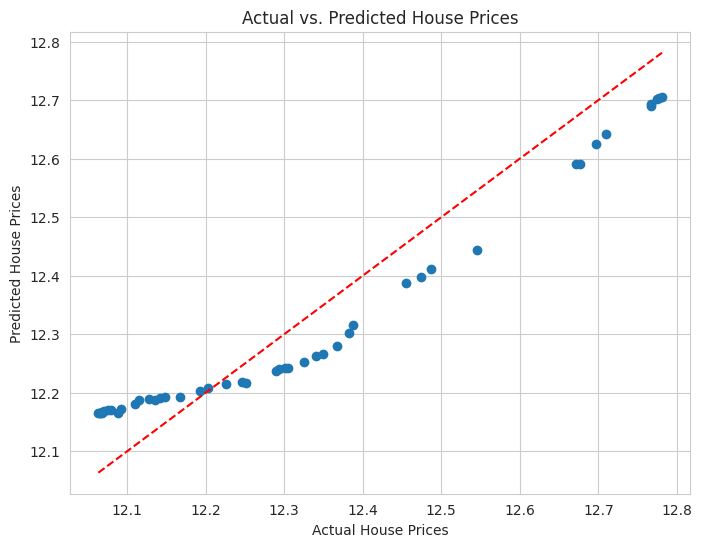

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()

## Analysis
The chart isn't as clean as I would of preferred, but it does show some accuracy in predicting values.

# Conclusion
This was more annoying than my previous attempts at messing with this data. Cleaning the NaN and getting SVM to a reasonable R$^2$ took the most time. But we have a SVM model that can somewhat predict house prices and have grouped states by the average price of houses there.

# Direct Comparison

In [65]:
import plotly.graph_objects as go

finalComparison = FramesUnite.copy()
finalComparison.reset_index(inplace=True)
finalComparison = finalComparison[["Date", "InflationIndex", "Average", "Glass$", "Lumber$", "Asphalt$", "Cement$", "Plumbing$", "Metals$"]]
FramesUniteMelted = finalComparison.melt(id_vars='Date', var_name='Dataset', value_name='Index Value')
for col in finalComparison:
    if col != 'Date':
        finalComparison[col] = finalComparison[col].pct_change() * 100

FramesUniteMelted = finalComparison.melt(id_vars='Date', var_name='Dataset', value_name='Index Value')

comparison_target1 = FramesUniteMelted['Dataset'].unique()[0]
comparison_target2 = FramesUniteMelted['Dataset'].unique()[1]

# Create the interactive plot
fig = go.Figure()

# Add traces for the comparison targets
comparison_data1 = FramesUniteMelted[FramesUniteMelted['Dataset'] == comparison_target1]
fig.add_trace(go.Scatter(x=comparison_data1['Date'],
                         y=comparison_data1['Index Value'],
                         mode='lines',
                         name=comparison_target1,
                         visible=True))  # Always show the first comparison target

comparison_data2 = FramesUniteMelted[FramesUniteMelted['Dataset'] == comparison_target2]
fig.add_trace(go.Scatter(x=comparison_data2['Date'],
                         y=comparison_data2['Index Value'],
                         mode='lines',
                         name=comparison_target2,
                         visible=True))  # Always show the second comparison target


# Add traces for the other datasets, initially hidden
for dataset in FramesUniteMelted['Dataset'].unique():
    if dataset not in [comparison_target1, comparison_target2]:
        dataset_data = FramesUniteMelted[FramesUniteMelted['Dataset'] == dataset]
        fig.add_trace(go.Scatter(x=dataset_data['Date'],
                                 y=dataset_data['Index Value'],
                                 mode='lines',
                                 name=dataset,
                                 visible=False))

buttons = []

# Add an "All" button
buttons.append(dict(
    args=[{"visible": [True] * len(FramesUniteMelted['Dataset'].unique())}],
    label="All",
    method="update"
))
# Add a "None" button
visibility_none = [False] * len(FramesUniteMelted['Dataset'].unique())
visibility_none[0] = True  # Show the first comparison target
visibility_none[1] = True  # Show the second comparison target
buttons.append(dict(
    args=[{"visible": visibility_none}],
    label="None",
    method="update"
))

for i, dataset in enumerate(FramesUniteMelted['Dataset'].unique()):
    if dataset not in [comparison_target1, comparison_target2]:
        visibility = [False] * len(FramesUniteMelted['Dataset'].unique())
        visibility[0] = True  # Always show the first comparison target
        visibility[1] = True  # Always show the second comparison target
        visibility[i] = True  # Show the current dataset
        buttons.append(dict(
            args=[{"visible": visibility}],
            label=dataset,
            method="update"
        ))
# Update layout with buttons in a dropdown menu
fig.update_layout(title='Percentage Change Over Time',
                  xaxis_title='Date',
                  yaxis_title='Percentage Change',
                  xaxis=dict(dtick='M1'),
                  updatemenus=[
                      dict(
                          type="dropdown",
                          direction="down",
                          buttons=buttons,
                          pad={"r": 10, "t": 10},
                          showactive=True,
                          x=0.1,
                          xanchor="left",
                          y=1.1,
                          yanchor="top"
                      ),
                  ])
fig.update_layout(
       autosize=False,  # Disable autosizing
       width=1800,      # Set the width (in pixels)
       height=900       # Set the height (in pixels)
   )
fig.show()

In [66]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-latex-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-lo

# Conclusion
Upon inspecting the interactive graph allowing us to compare the chaging prices of houses since 2010, it appears that the housing prices do not cleanly follow either the inflation or materials price changes. It is likely a complex combination of the two. It also likely doesn't happen immediately, and takes time to propogate.

In [67]:
!jupyter nbconvert --to pdf /content/Data-Science-Project/Final.ipynb

[NbConvertApp] Converting notebook /content/Data-Science-Project/Final.ipynb to pdf
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  ((*- endblock -*))
[NbConvertApp] Support files will be in Final_files/
[NbConvertApp] Making directory ./Final_files
[NbConvertApp] Writing 296793 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1988833 bytes to /content/Data-Science-Project/Final.pdf
